---
# pRF ses-4

This notebook aims to unravel the frequency domain of our pRF-design, on which we can then base our filtering operations

In [41]:
from linescanning import utils, plotting
from pRFline import fitting
import numpy as np
import warnings
import os
opj = os.path.join

warnings.simplefilter('ignore')
project_dir = os.environ.get("DIR_PROJECTS")
base_dir = os.path.join(project_dir, 'hemifield')
deriv_dir = opj(base_dir, 'derivatives')

plot_vox = 359
plot_xkcd = False
np.set_printoptions(precision=3)


In [42]:
# Load data
sub         = '003'
ses         = 4
task        = "task-pRF"
run         = [2,5]
func_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func")
anat_dir    = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "anat")
prf_new     = opj(base_dir, 'derivatives', 'prf', f"sub-{sub}", f"ses-{ses}")
ribbon      = [357,364]

if not os.path.exists(prf_new):
    os.makedirs(prf_new, exist_ok=True)

Use `fitting.FitLines()`-class, which inherits from `linescanning.dataset.Dataset`, to read in the functional files, and average across runs and iterations

In [44]:
# func_files = utils.get_file_from_substring(["task-pRF", "bold.mat"], func_dir, exclude="run-2")
log_dir = "/data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs"
# # log_dir = "/mnt/d/FSL/shared/spinoza/programs/project_repos/LineExps/lineprf/logs/sub-003_ses-4_task-pRF_run-imgs"
ref_slices = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", "acq-1slice", ".nii.gz"], anat_dir, exclude="run-2")
ref_slices


['/mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-4_T1w.nii.gz',
 '/mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-5_T1w.nii.gz',
 '/mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-6_T1w.nii.gz']

## aCompCor, no low-pass, separate runs

DATASET

FUNCTIONAL
Preprocessing /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-4_bold.mat
 Filtering strategy: 'hp'
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Source dir: /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/nighres/sub-003/ses-1
 Target session: ses-4
 Foldover: FH
 Ref slice: /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-4_T1w.nii.gz
 Found 55 voxels for nuisance regression
 We're good to go!
 Using 5 components for aCompCor (WM/CSF separately)
 Found 1 component(s) in 'csf'-voxels with total explained variance of 0.49%
 Found 1 component(s) in 'wm'-voxels with total explained variance of 0.72%
 DCT high-pass filter on components [removes low frequencies <0.22 Hz]

DATASET: created
Fetching dataframe from attribute 'df_func_zscore'
 Baseline 	 = 190 vols (~19.95s) based o

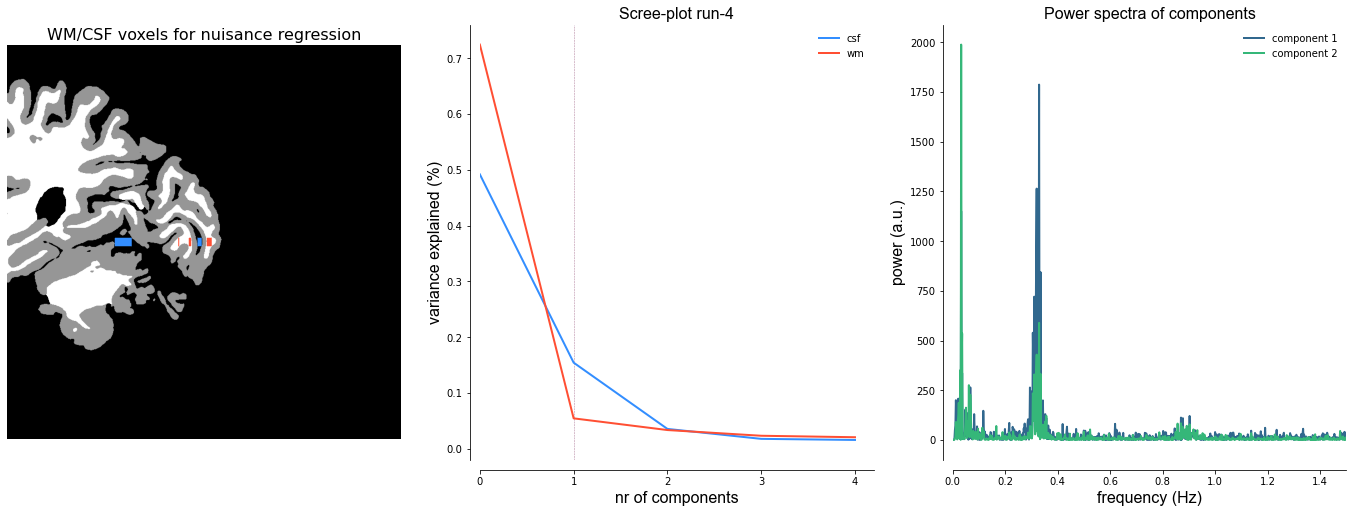

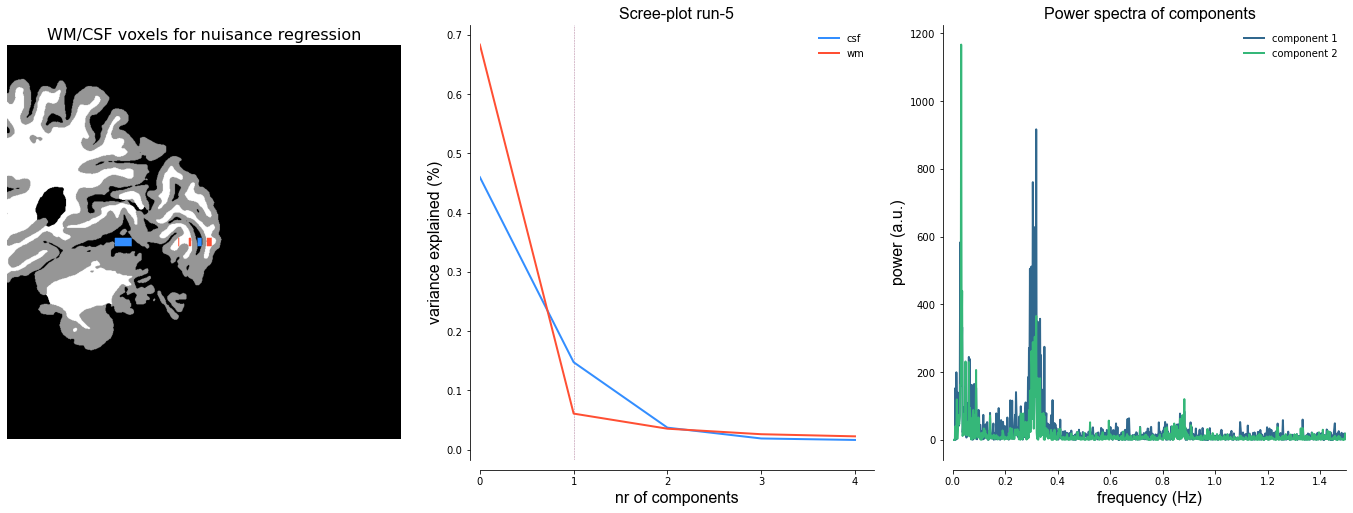

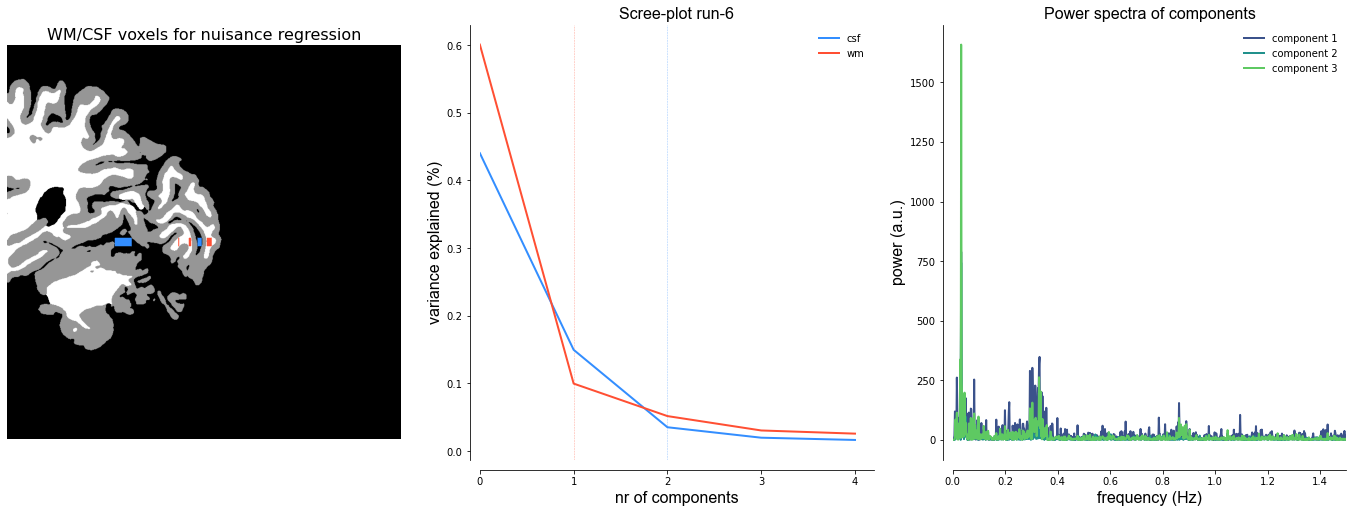

In [66]:
# run-4
run4 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-4", "bold.mat"], func_dir)
run5 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-5", "bold.mat"], func_dir)
run6 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-6", "bold.mat"], func_dir)
funcs = [run4, run5]

hp = True
lp = False
run4_zscore_acomp = fitting.FitLines(func_files=run4,
                                     TR=0.105,
                                     low_pass=lp,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[0],
                                     filter_pca=0.22,
                                     rsq_threshold=0.05)

run5_zscore_acomp = fitting.FitLines(func_files=run5,
                                     TR=0.105,
                                     low_pass=lp,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[1],
                                     filter_pca=0.22,
                                     rsq_threshold=0.05)

run6_zscore_acomp = fitting.FitLines(func_files=run6,
                                     TR=0.105,
                                     low_pass=lp,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[2],
                                     filter_pca=0.22,
                                     rsq_threshold=0.05)                                     

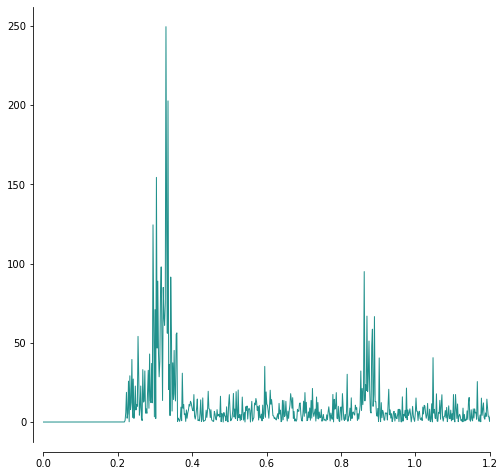

In [70]:
freq_, power_ = run6_zscore_acomp.get_freq(run6_zscore_acomp.confs[:,2], TR=run6_zscore_acomp.TR, spectrum_type="fft")
plotting.LazyPlot(power_, freq_, figsize=(8,8), x_lim=[0,1.2])

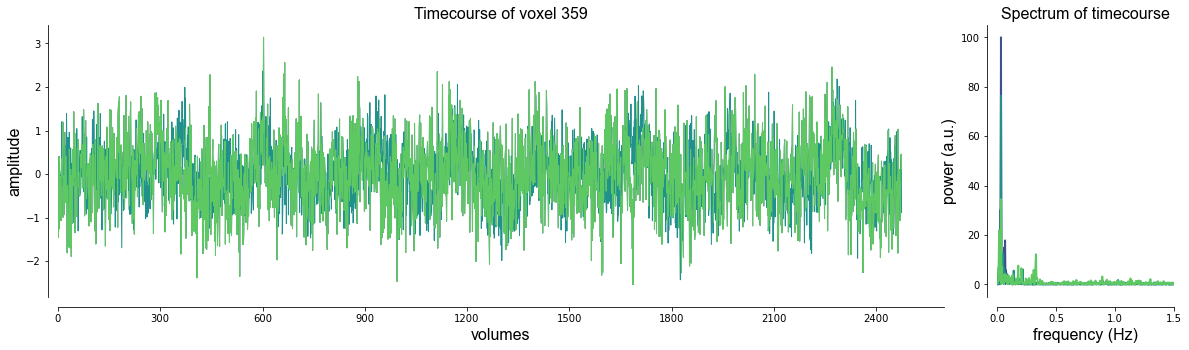

In [76]:
freq_type = "fft"
clipper = 100
# tc1 = run4_zscore_acomp.avg_iters_baseline[:,359]
tc1 = run4_zscore_acomp.avg_iters_baseline[:,359]
tc2 = run5_zscore_acomp.avg_iters_baseline[:,359]
tc3 = run6_zscore_acomp.avg_iters_baseline[:,359]

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[10, 2], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot([tc3, tc2, tc3],
                  x_label="volumes",
                  y_label="amplitude",
                  title="Timecourse of voxel 359",
                  axs=ax1,
                  font_size=16,
                  line_width=1)

ax2 = fig.add_subplot(gs[1])
tc1_freq = run4_zscore_acomp.get_freq(tc1, TR=0.105, spectrum_type=freq_type, clip_power=clipper)
tc2_freq = run5_zscore_acomp.get_freq(tc2, TR=0.105, spectrum_type=freq_type, clip_power=clipper)
tc3_freq = run6_zscore_acomp.get_freq(tc3, TR=0.105, spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot([tc1_freq[1], tc2_freq[1], tc3_freq[1]],
                  xx=tc1_freq[0],
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  title="Spectrum of timecourse",
                  axs=ax2,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0, 1.5],
                  line_width=2)


In [79]:
# fit the stuff
run4_zscore_acomp.fit()
run5_zscore_acomp.fit()
run6_zscore_acomp.fit()

Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset times from log-file

EXPTOOLS
 1st 't' @11.87s
 Cutting 11.87s from onsets
Creating design matrix (can take a few minutes with thousands of TRs)
Design matrix has shape: (270, 270, 2476)
Shapes of design matrix and functional data match. Ready for fit!
Running fit with norm-model
Starting gauss grid fit at 2022/03/08 18:30:19
Gaussian gridfit completed at 2022/03/08 18:33:33. voxels/vertices above 0.1: 90 out of 720
Gridfit took 0:03:14.342608
Mean rsq>0.1: 0.21519242061509025
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-gauss_stage-grid_desc-prf_params.npy
Starting gauss iterfit at 2022/03/08 18:33:33
Gaussian iterfit completed at 2022/03/08 18:34:54. Mean rsq>0.1: 0.21519237804390892
Iterfit took 0:01:20.840164
Save iter-fit parameters in

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   31.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   35.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  5.2min finished


Norm gridfit completed at 2022/03/08 18:40:30. Mean rsq>0.1: 0.24646083704299396
Gridfit took 0:05:14.029733
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/08 18:40:30
Norm iterfit completed at 2022/03/09 03:48:46. Mean rsq>0.1: 0.2539116707052851
Iterfit took 9:08:16.512892
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-predictions.npy
Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset times from log-file

EX

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   33.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  4.2min finished


Norm gridfit completed at 2022/03/09 04:00:29. Mean rsq>0.1: 0.17509216328461966
Gridfit took 0:04:09.380694
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/09 04:00:29
Norm iterfit completed at 2022/03/09 12:55:27. Mean rsq>0.1: 0.18314870016468113
Iterfit took 8:54:58.100474
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-predictions.npy
Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset times from log-file

E

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   20.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   30.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   34.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  3.6min finished


Norm gridfit completed at 2022/03/09 13:07:22. Mean rsq>0.1: 0.18960561651375987
Gridfit took 0:03:33.672864
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/09 13:07:22
Norm iterfit completed at 2022/03/09 18:35:45. Mean rsq>0.1: 0.19094703214346193
Iterfit took 5:28:22.965623
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_model-norm_stage-iter_desc-predictions.npy


### aCompCor | high-pass | run-4

#### Ribbon voxels

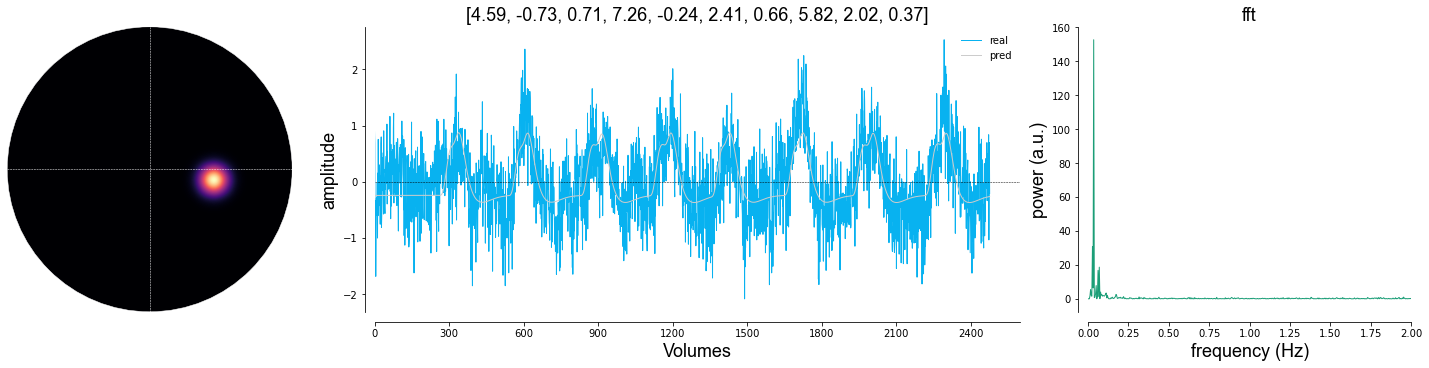

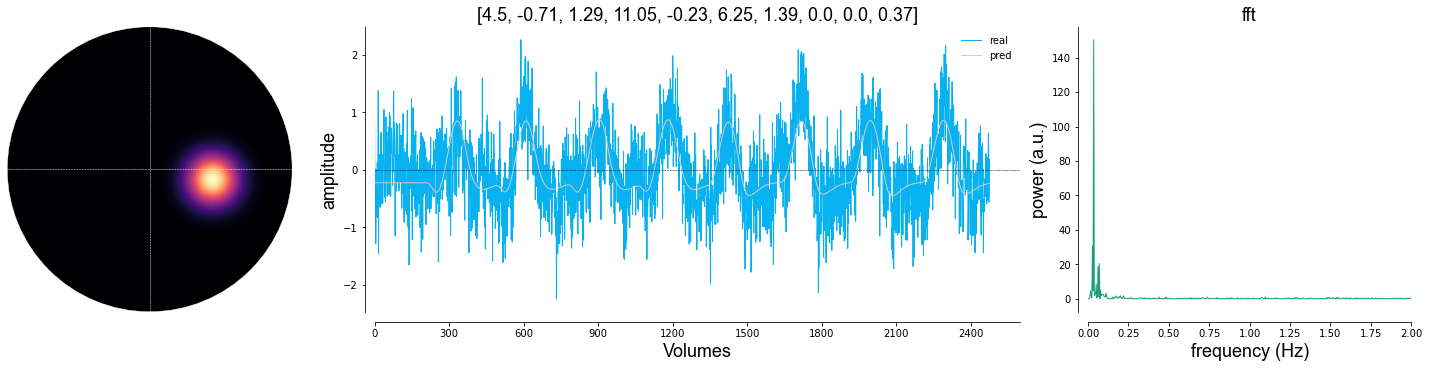

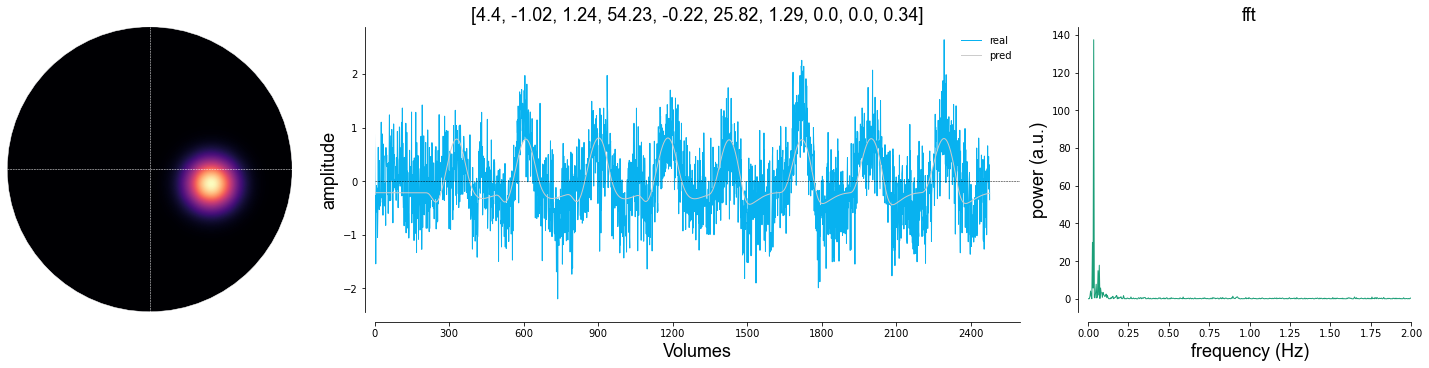

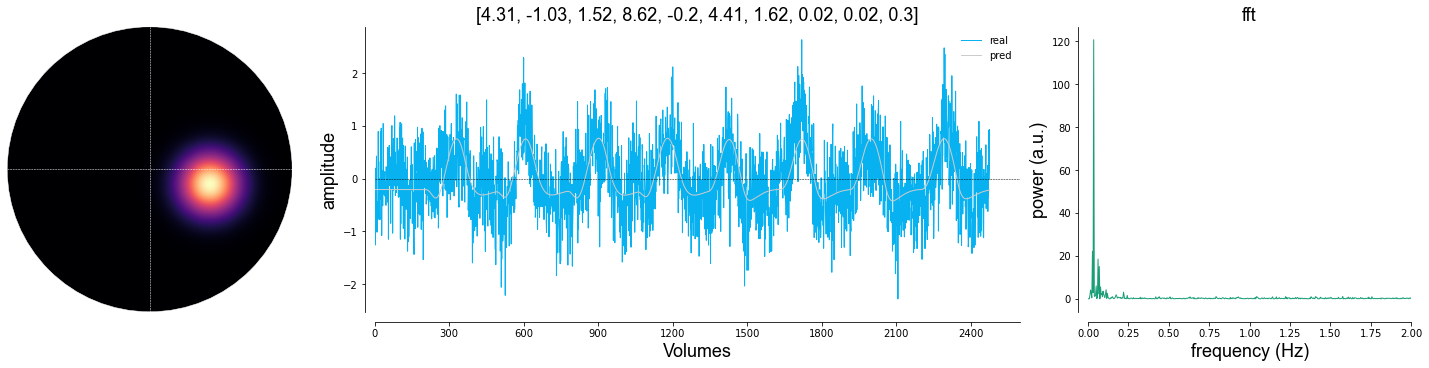

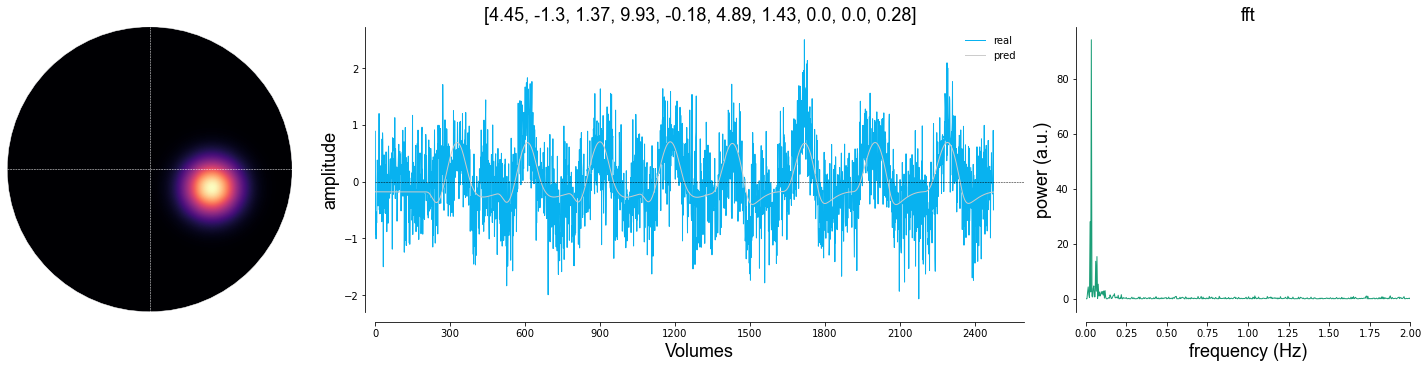

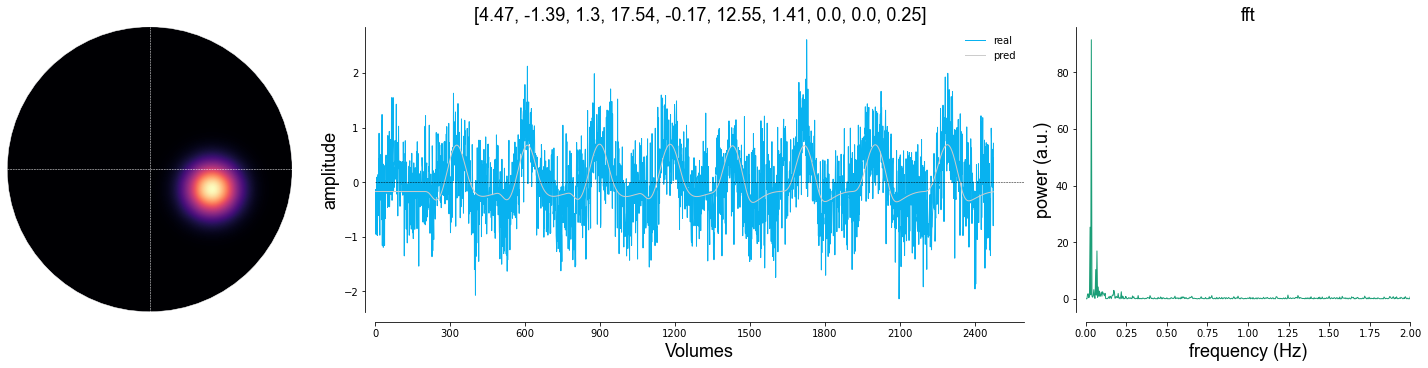

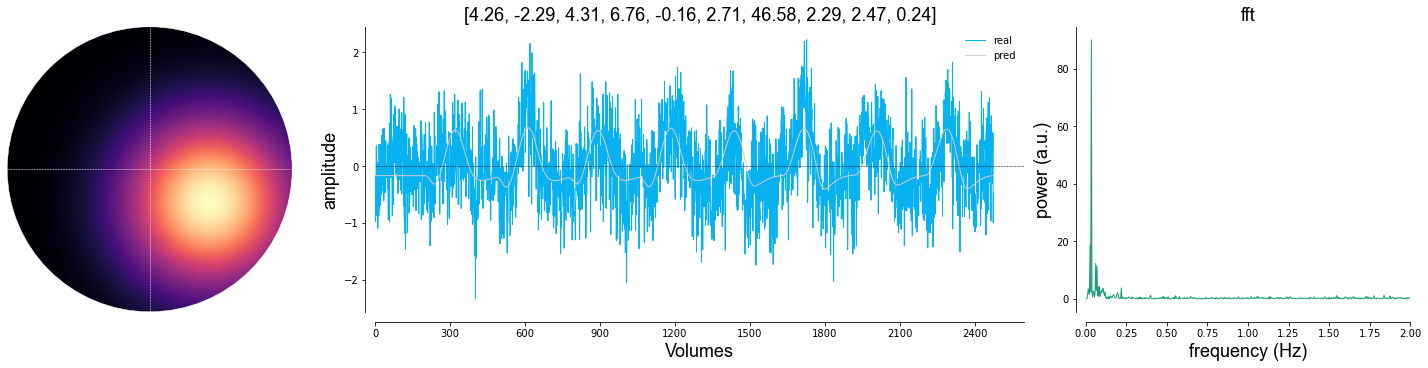

In [91]:
for vox_id in range(*ribbon):
    pars,_,_ = run4_zscore_acomp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

GM-patch before target area

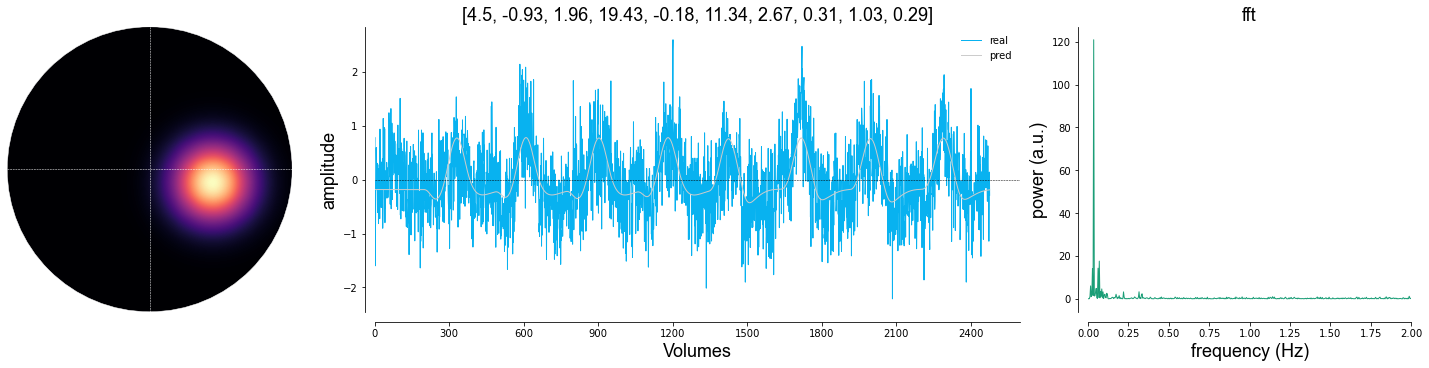

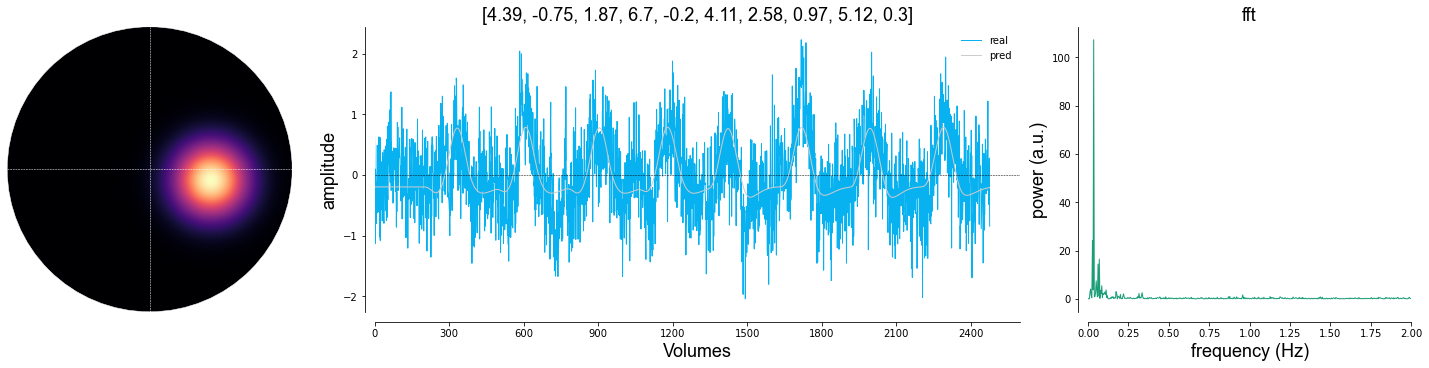

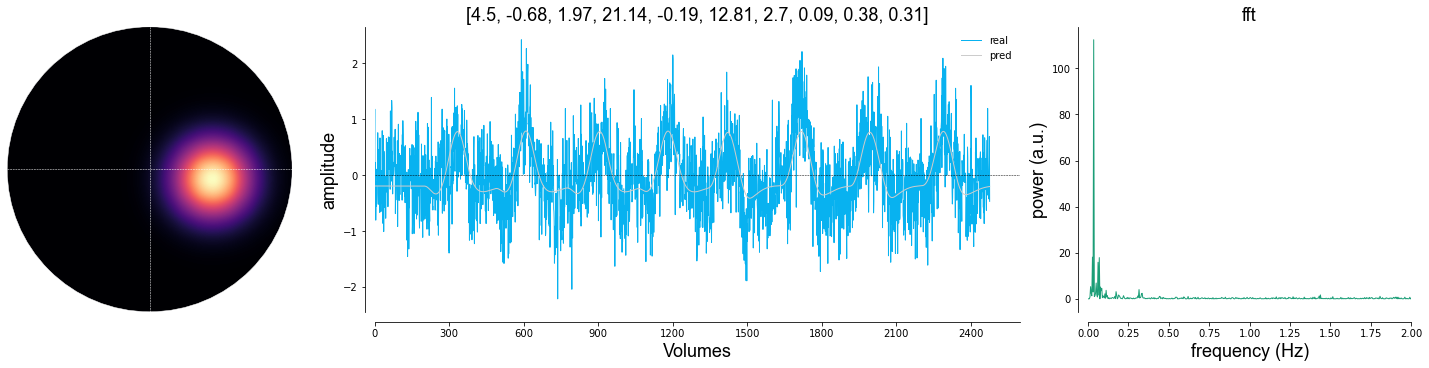

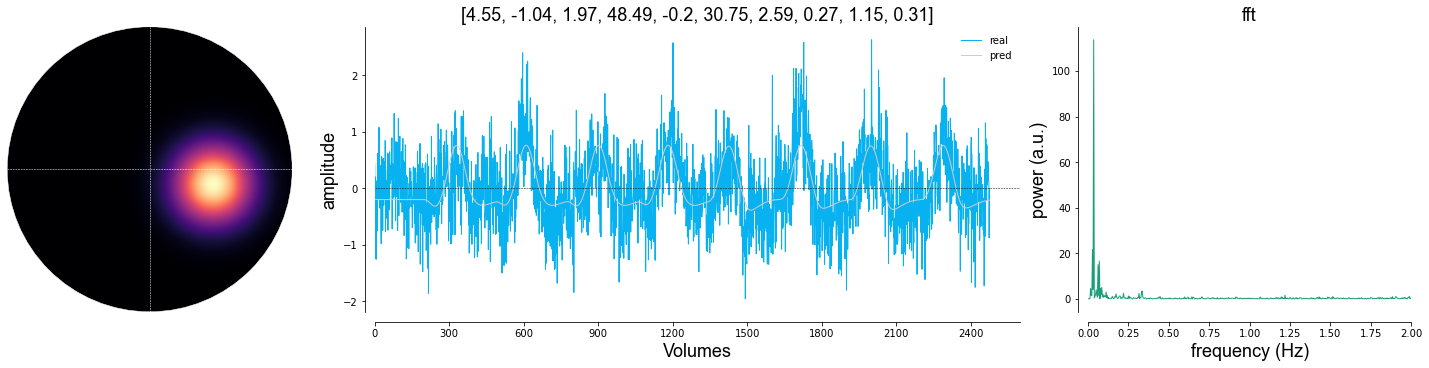

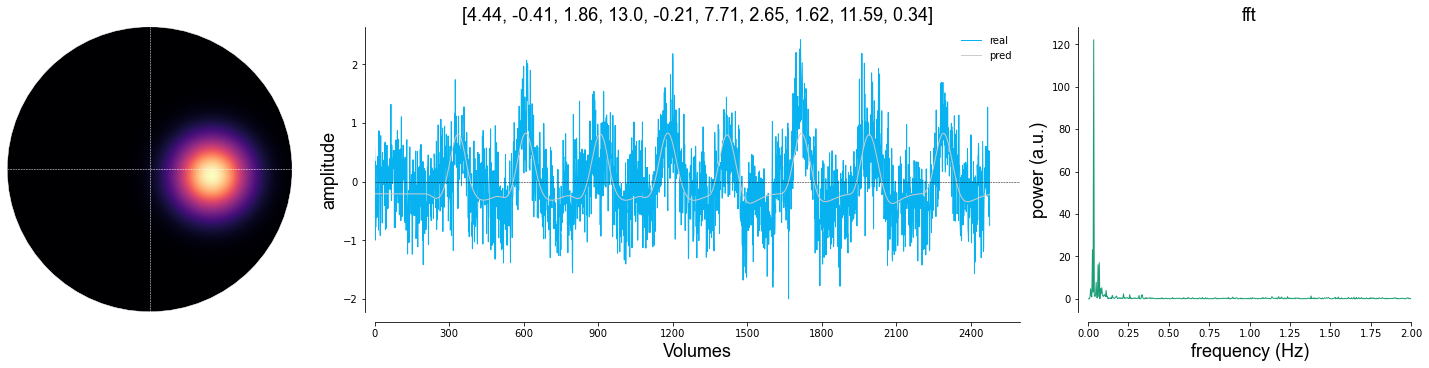

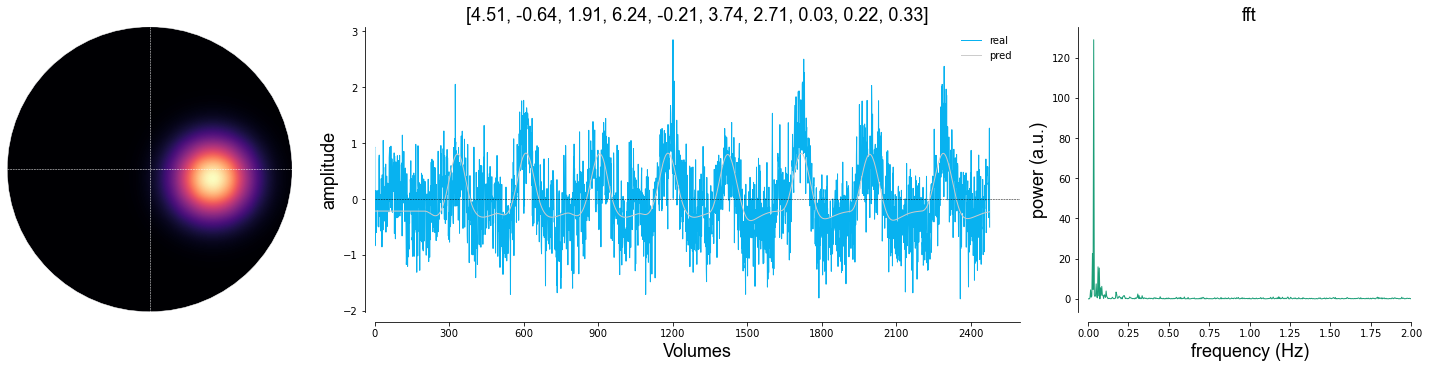

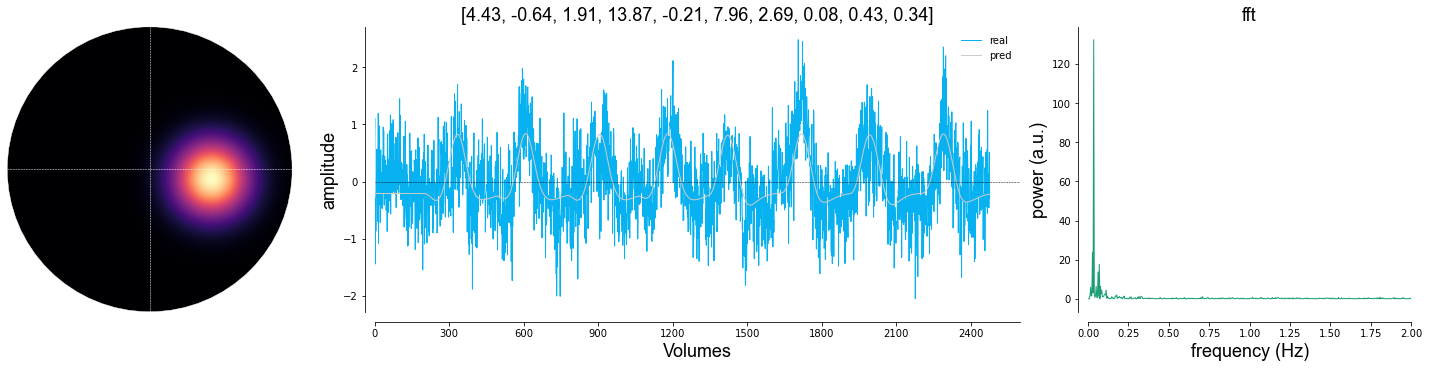

In [94]:
for vox_id in range(*[342,349]):
    pars,_,_ = run4_zscore_acomp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

### aCompCor | high-pass | run-5

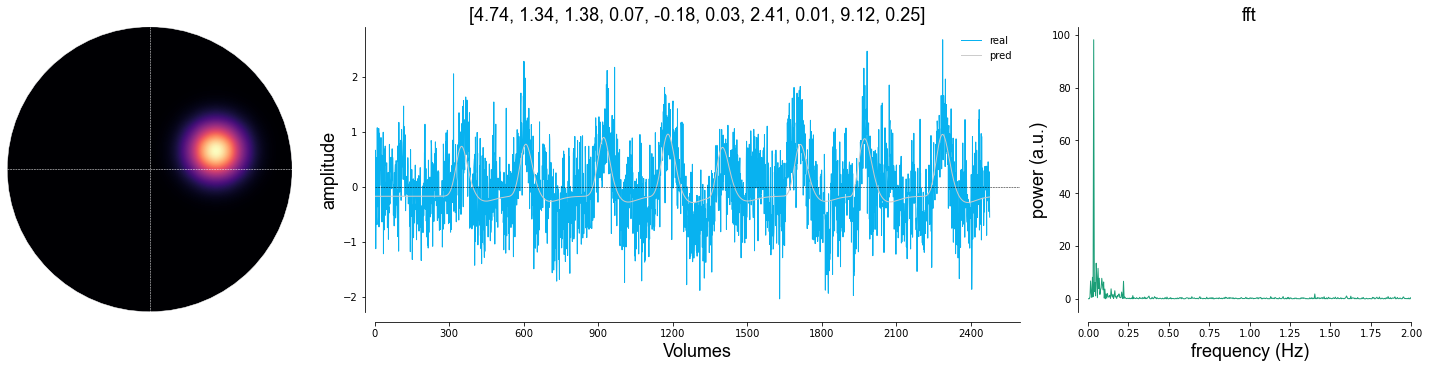

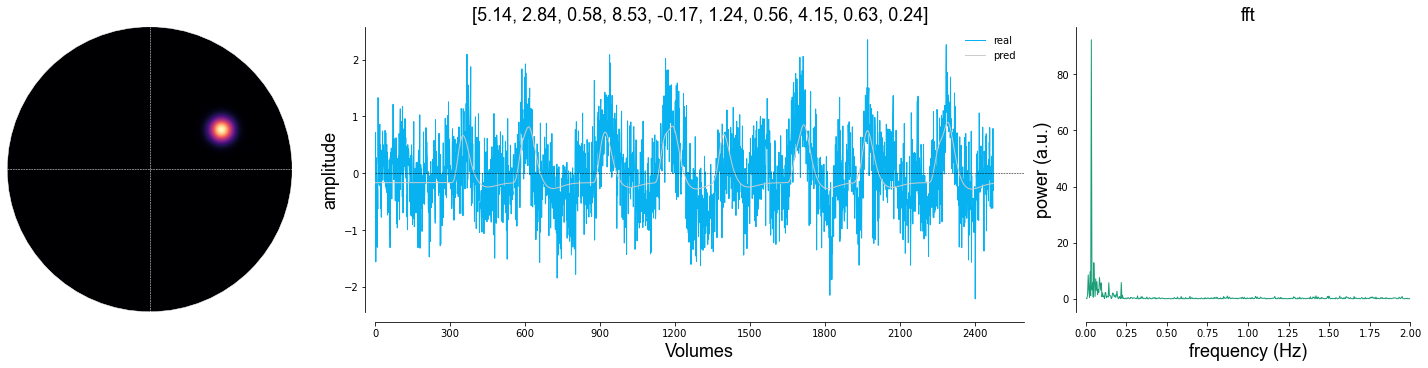

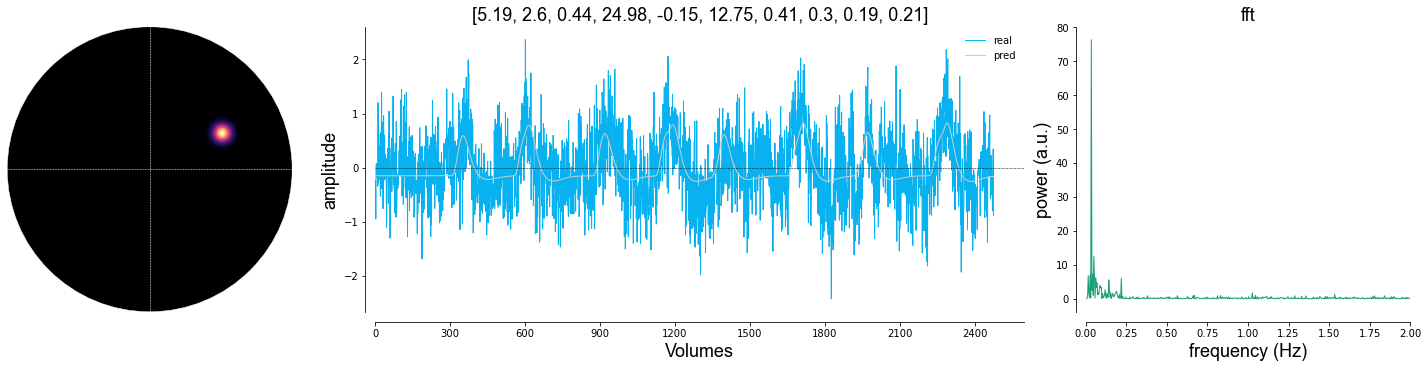

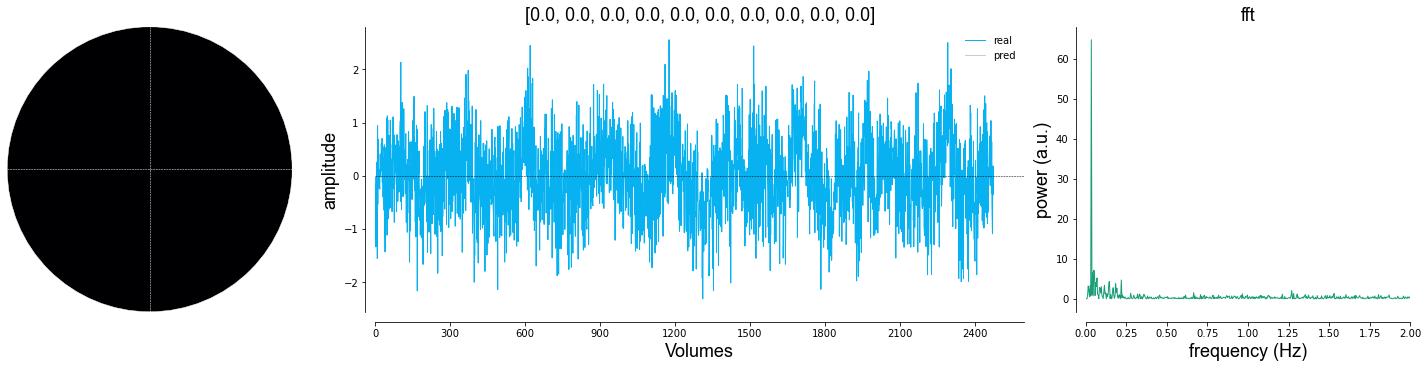

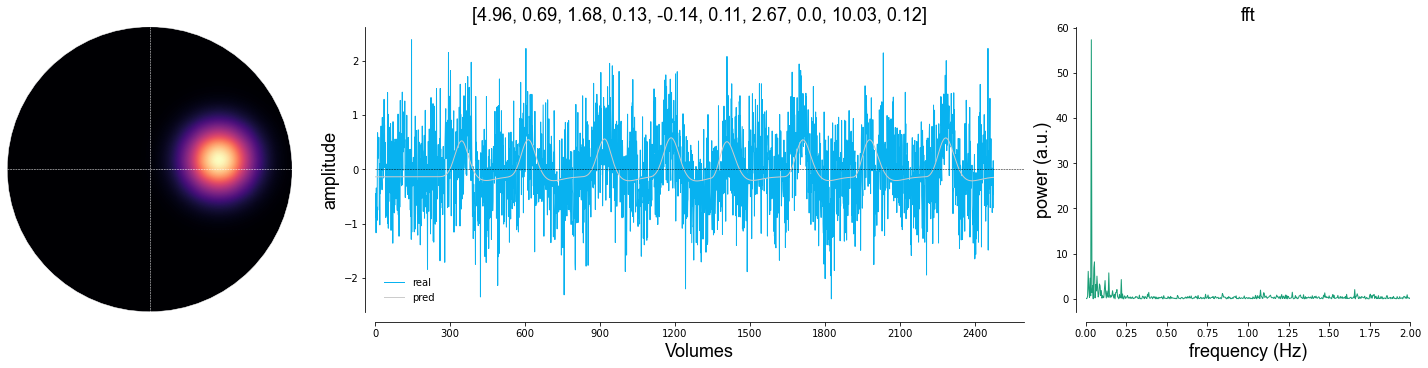

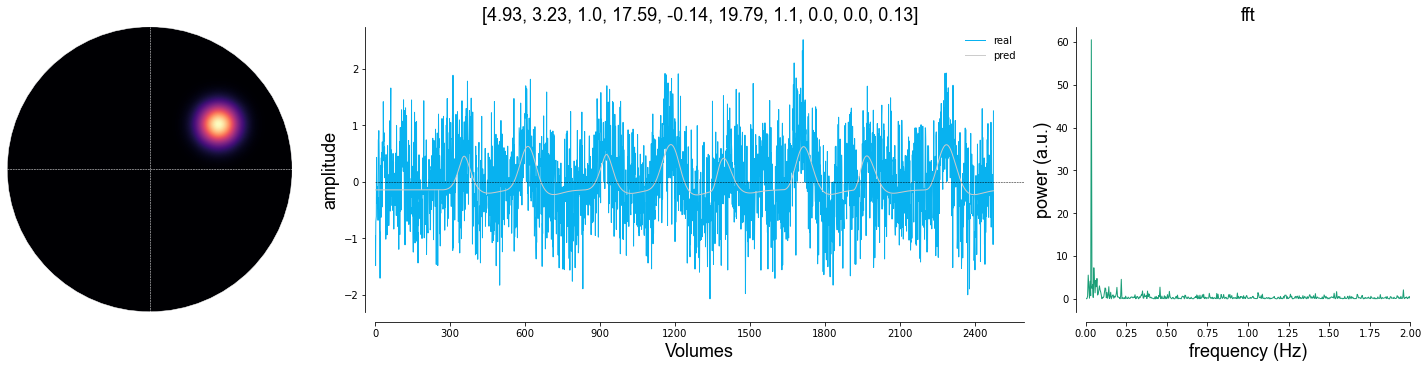

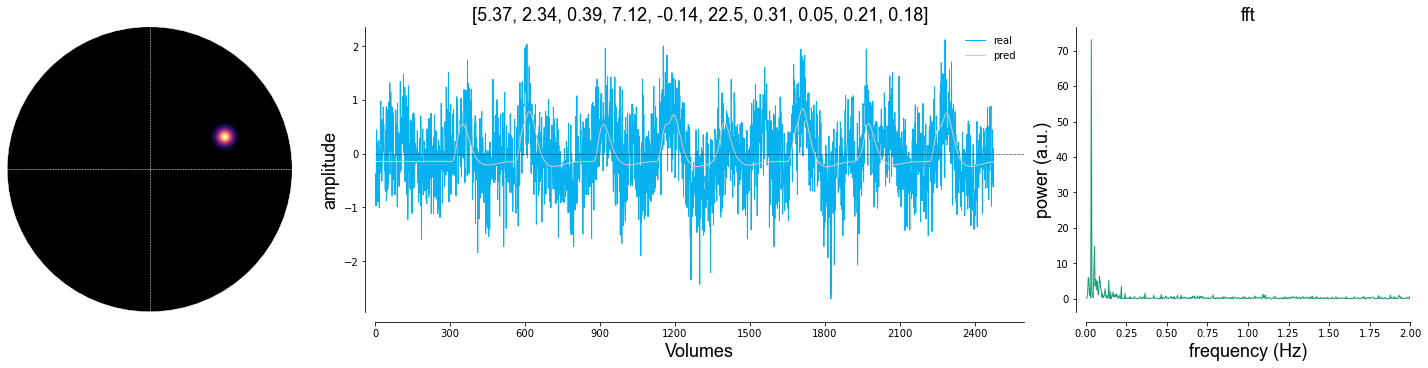

In [92]:
for vox_id in range(*ribbon):
    pars,_,_ = run5_zscore_acomp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

### aCompCor | high-pass | run-6

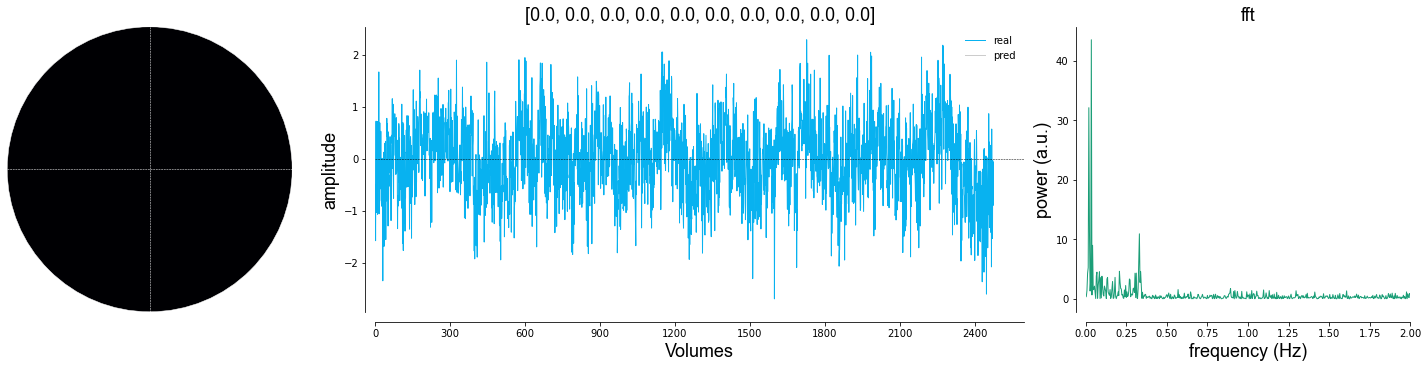

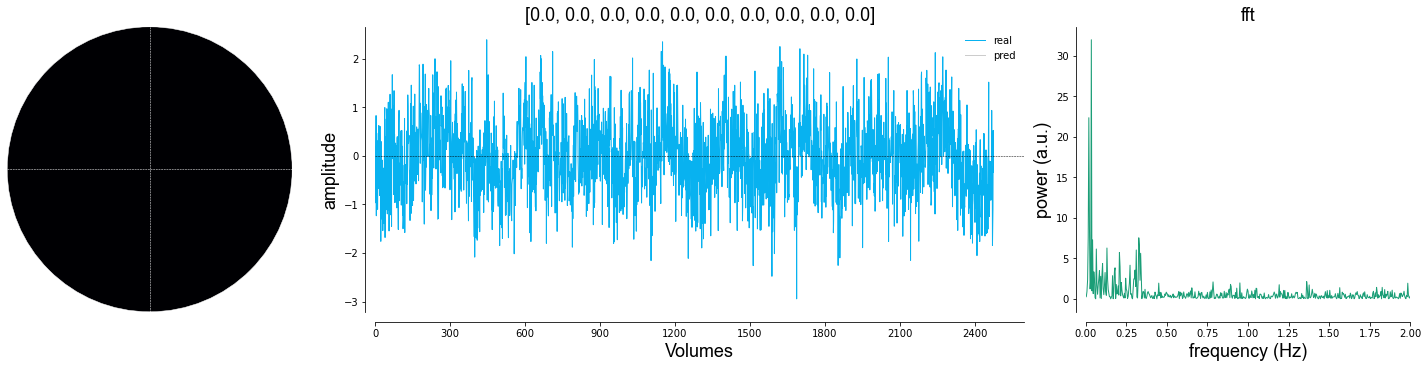

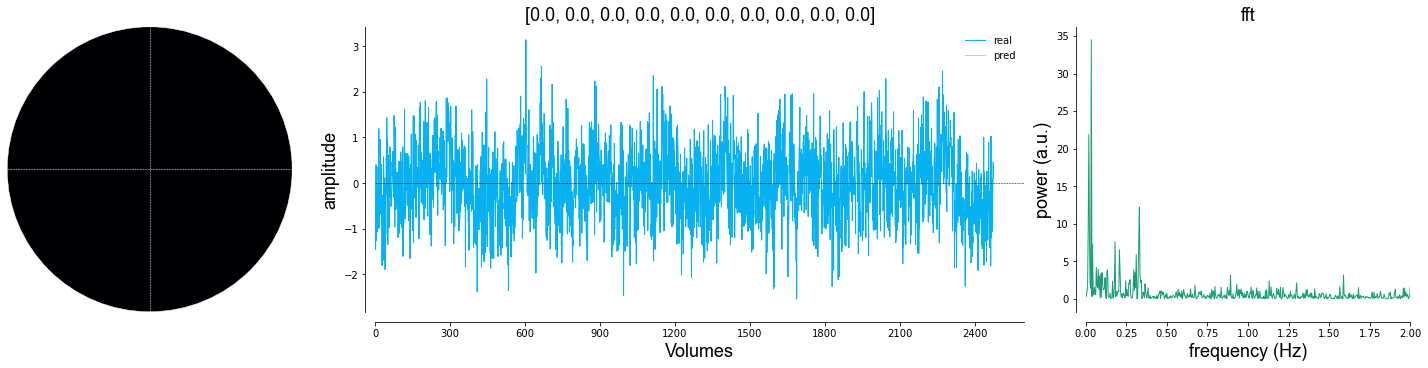

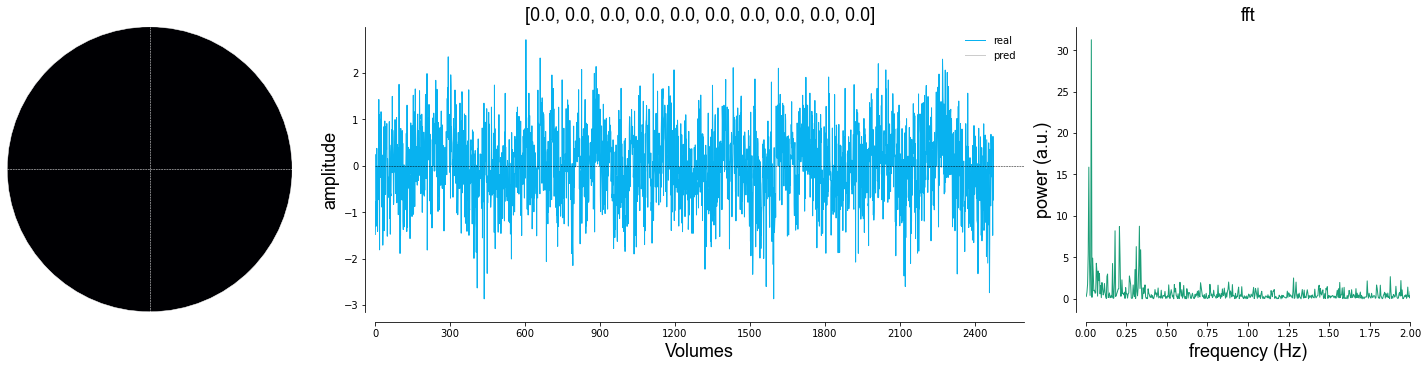

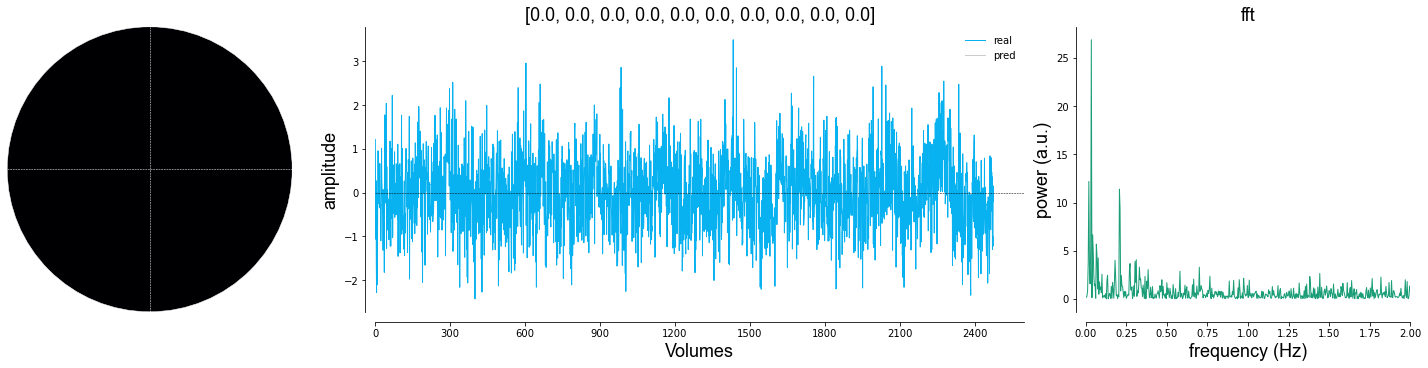

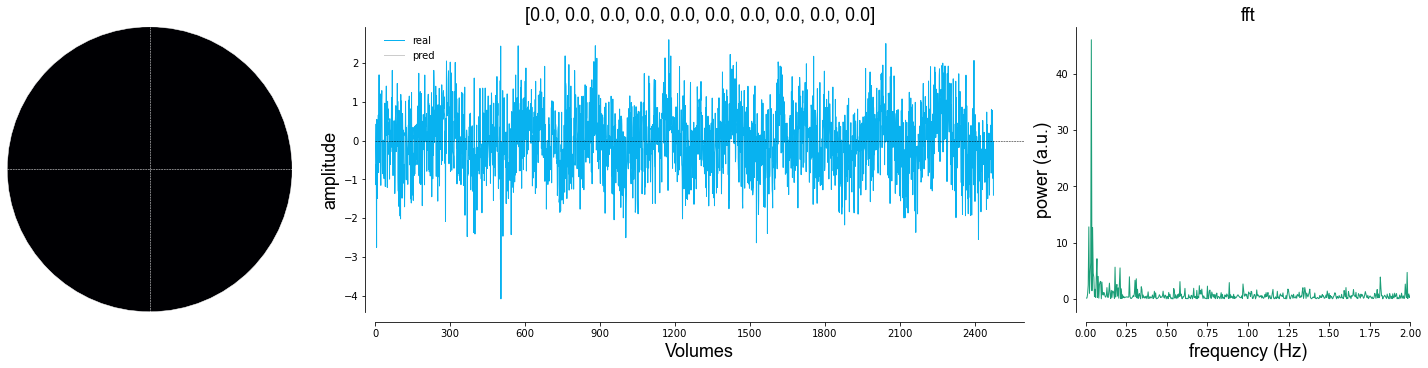

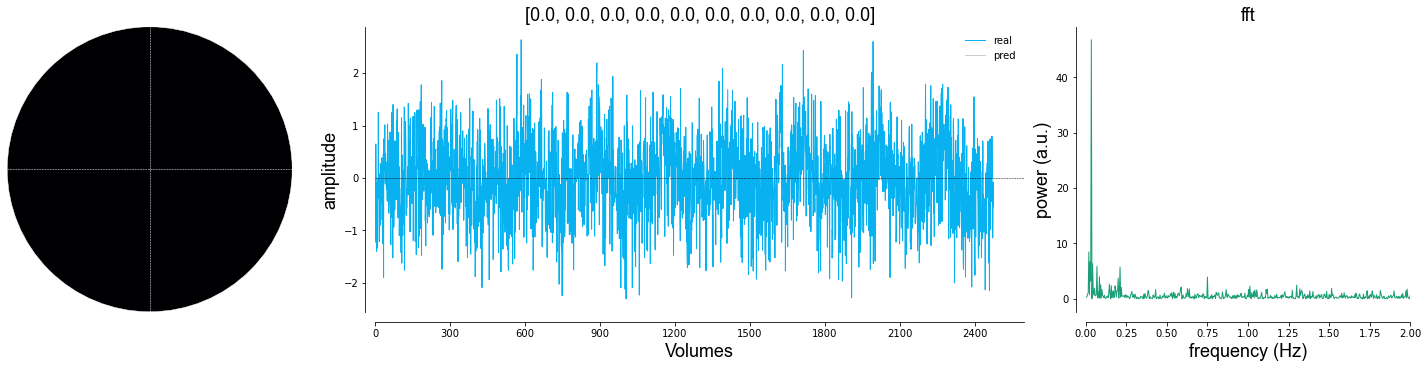

In [93]:
for vox_id in range(*ribbon):
    pars,_,_ = run6_zscore_acomp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

## aCompCor, bit of low-pass, separate runs

DATASET

FUNCTIONAL
Preprocessing /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/func/sub-003_ses-4_task-pRF_run-4_bold.mat
 Filtering strategy: 'lp'
 Cutting 0 volumes from beginning
 DCT-high pass filter [removes low frequencies <0.01 Hz]
 Source dir: /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/derivatives/nighres/sub-003/ses-1
 Target session: ses-4
 Foldover: FH
 Ref slice: /mnt/export/data1/projects/MicroFunc/Jurjen/projects/hemifield/sub-003/ses-4/anat/sub-003_ses-4_acq-1slice_run-4_T1w.nii.gz
 Found 55 voxels for nuisance regression
 We're good to go!
 Using 5 components for aCompCor (WM/CSF separately)
 Found 1 component(s) in 'csf'-voxels with total explained variance of 0.49%
 Found 1 component(s) in 'wm'-voxels with total explained variance of 0.72%
 DCT high-pass filter on components [removes low frequencies <0.22 Hz]
 Using aCompCor-data for low-pass filtering
 Savitsky-Golay low-pass filter [removes high frequences] (window

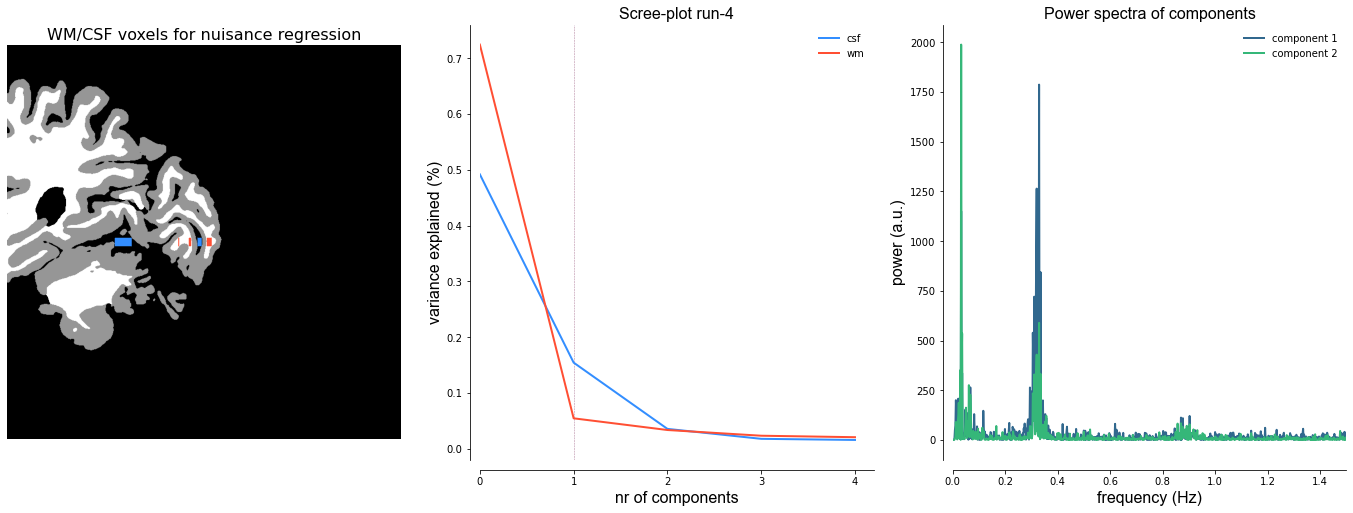

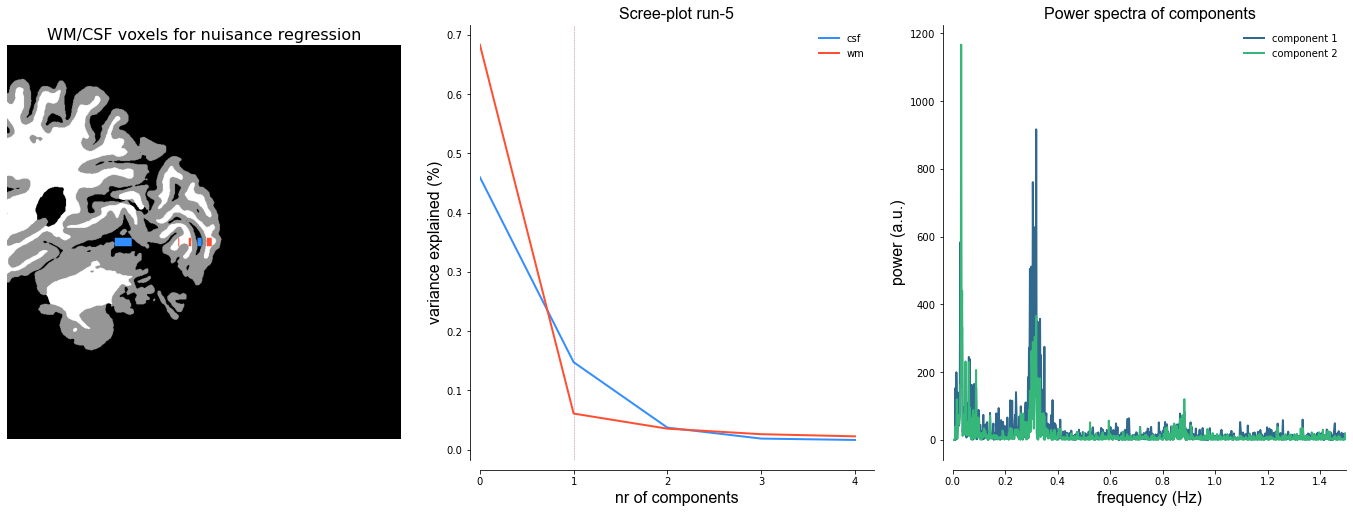

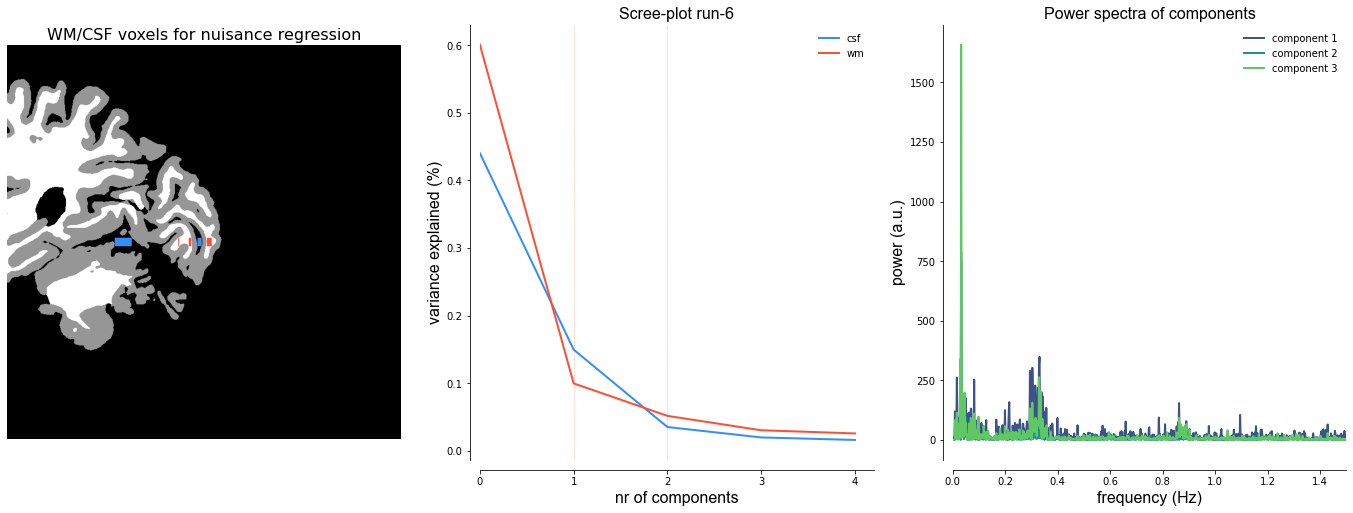

In [80]:
# run-4
run4 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-4", "bold.mat"], func_dir)
run5 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-5", "bold.mat"], func_dir)
run6 = utils.get_file_from_substring([f"sub-{sub}", f"ses-{ses}", f"{task}", "run-6", "bold.mat"], func_dir)

lp = True
out_fname = "sub-003_ses-4_task-pRF_acq-line"
run4_zscore_acomp_lp = fitting.FitLines(func_files=run4,
                                     TR=0.105,
                                     low_pass=lp,
                                     window_size=11,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[0],
                                     filter_pca=0.22,
                                     output_base=f"{out_fname}_run-4",
                                     rsq_threshold=0.05)

run5_zscore_acomp_lp = fitting.FitLines(func_files=run5,
                                     TR=0.105,
                                     low_pass=lp,
                                     window_size=11,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[1],
                                     filter_pca=0.22,
                                     output_base=f"{out_fname}_run-5",
                                     rsq_threshold=0.05)

run6_zscore_acomp_lp = fitting.FitLines(func_files=run6,
                                     TR=0.105,
                                     low_pass=lp,
                                     window_size=11,
                                     log_dir=log_dir,
                                     stage='grid+iter',
                                     model='norm',
                                     baseline_duration=20,
                                     iter_duration=240,
                                     n_iterations=1,
                                     verbose=True,
                                     strip_baseline=False,
                                     acompcor=True,
                                     ref_slice=ref_slices[2],
                                     filter_pca=0.22,
                                     output_base=f"{out_fname}_run-6",
                                     rsq_threshold=0.05)                                     

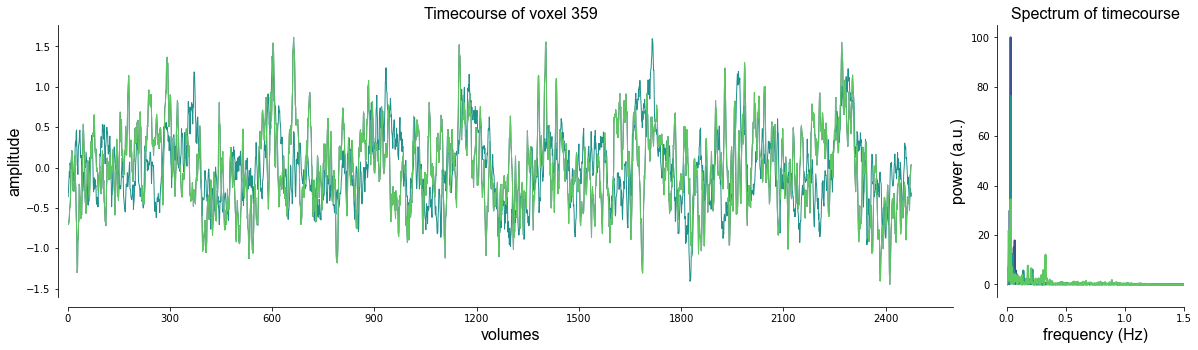

In [78]:
freq_type = "fft"
clipper = 100
# tc1 = run4_zscore_acomp.avg_iters_baseline[:,359]
tc1_lp = run4_zscore_acomp_lp.avg_iters_baseline[:,359]
tc2_lp = run5_zscore_acomp_lp.avg_iters_baseline[:,359]
tc3_lp = run6_zscore_acomp_lp.avg_iters_baseline[:,359]

fig = plt.figure(figsize=(20, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[10, 2], wspace=0.1)

ax1 = fig.add_subplot(gs[0])
plotting.LazyPlot([tc3_lp, tc2_lp, tc3_lp],
                  x_label="volumes",
                  y_label="amplitude",
                  title="Timecourse of voxel 359",
                  axs=ax1,
                  font_size=16,
                  line_width=1)

ax2 = fig.add_subplot(gs[1])
tc1_lp_freq = run4_zscore_acomp.get_freq(tc1_lp, TR=0.105, spectrum_type=freq_type, clip_power=clipper)
tc2_lp_freq = run5_zscore_acomp.get_freq(tc2_lp, TR=0.105, spectrum_type=freq_type, clip_power=clipper)
tc3_lp_freq = run6_zscore_acomp.get_freq(tc3_lp, TR=0.105, spectrum_type=freq_type, clip_power=clipper)

plotting.LazyPlot([tc1_lp_freq[1], tc2_lp_freq[1], tc3_lp_freq[1]],
                  xx=tc1_lp_freq[0],
                  x_label="frequency (Hz)",
                  y_label="power (a.u.)",
                  title="Spectrum of timecourse",
                  axs=ax2,
                  xkcd=False,
                  font_size=16,
                  x_lim=[0, 1.5],
                  line_width=2)


In [81]:
# fit the stuff
run4_zscore_acomp_lp.fit()
run5_zscore_acomp_lp.fit()
run6_zscore_acomp_lp.fit()

Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset times from log-file

EXPTOOLS
 1st 't' @11.87s
 Cutting 11.87s from onsets
Creating design matrix (can take a few minutes with thousands of TRs)
Design matrix has shape: (270, 270, 2476)
Shapes of design matrix and functional data match. Ready for fit!
Running fit with norm-model
Starting gauss grid fit at 2022/03/09 18:39:30
Gaussian gridfit completed at 2022/03/09 18:43:04. voxels/vertices above 0.1: 166 out of 720
Gridfit took 0:03:34.144202
Mean rsq>0.1: 0.3336057425083884
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-4_model-gauss_stage-grid_desc-prf_params.npy
Starting gauss iterfit at 2022/03/09 18:43:04
Gaussian iterfit completed at 2022/03/09 18:46:00. Mean rsq>0.1: 0.3335545912939347
Iterfit took 0:02:56.137611
Save iter-fit paramete

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   18.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   26.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   29.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   33.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   37.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  9.6min finished


Norm gridfit completed at 2022/03/09 18:56:04. Mean rsq>0.1: 0.38231081681617773
Gridfit took 0:09:38.756379
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-4_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/09 18:56:04
Norm iterfit completed at 2022/03/10 15:25:03. Mean rsq>0.1: -161.63852022264902
Iterfit took 20:28:58.566378
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-4_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-4_model-norm_stage-iter_desc-predictions.npy
Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset tim

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   34.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   38.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 10.4min finished


Norm gridfit completed at 2022/03/10 15:46:17. Mean rsq>0.1: 0.29154811874975134
Gridfit took 0:10:22.376216
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-5_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/10 15:46:17
Norm iterfit completed at 2022/03/11 05:59:31. Mean rsq>0.1: 0.3023708912105951
Iterfit took 14:13:13.969691
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-5_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-5_model-norm_stage-iter_desc-predictions.npy
Using /data1/projects/MicroFunc/Jurjen/projects/hemifield/sourcedata/sub-003/ses-4/sub-003_ses-4_task-pRF_run-imgs for design
Reading onset time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   35.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  6.4min finished


Norm gridfit completed at 2022/03/11 06:16:18. Mean rsq>0.1: 0.32989861110323354
Gridfit took 0:06:24.455740
Save grid-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-6_model-norm_stage-grid_desc-prf_params.npy
Starting norm iterfit at 2022/03/11 06:16:18
Norm iterfit completed at 2022/03/11 14:52:15. Mean rsq>0.1: 0.3344854537918336
Iterfit took 8:35:56.632500
Save iter-fit parameters in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-6_model-norm_stage-iter_desc-prf_params.npy
Save iter-fit predictions in /mnt/export/data1/projects/MicroFunc/Jurjen/programs/project_repos/pRFline/notebooks/prf/sub-003_ses-4_task-pRF_acq-line_run-6_model-norm_stage-iter_desc-predictions.npy


### aCompCor | low-pass | run-4

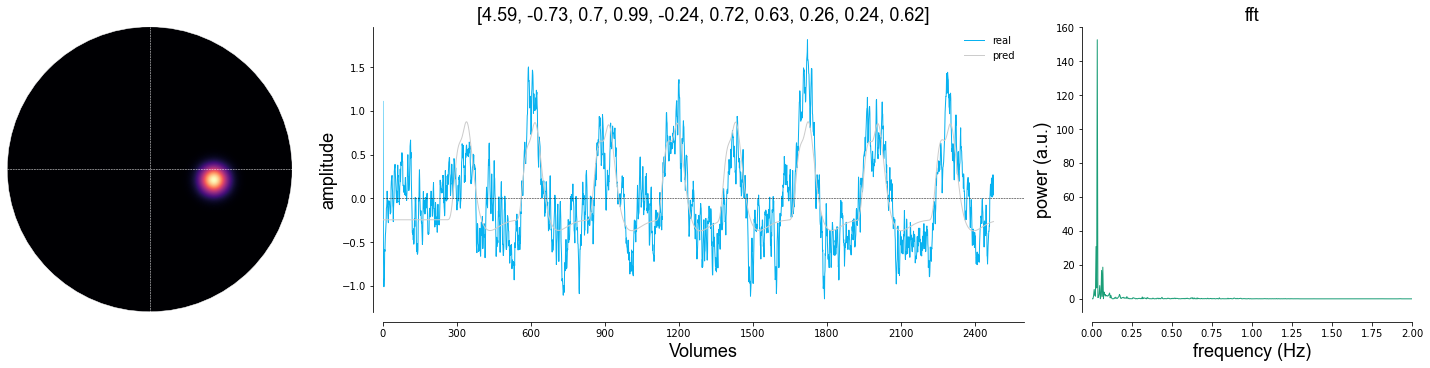

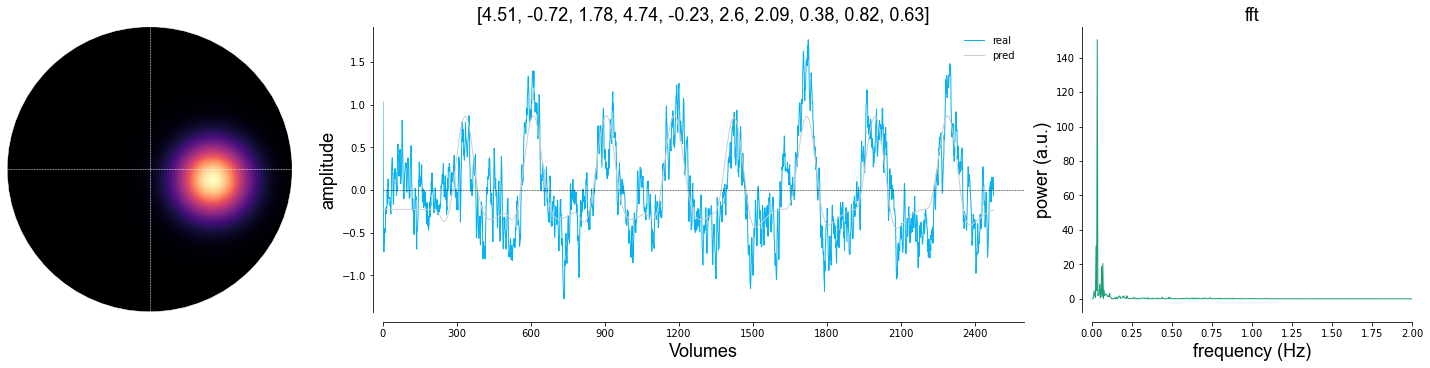

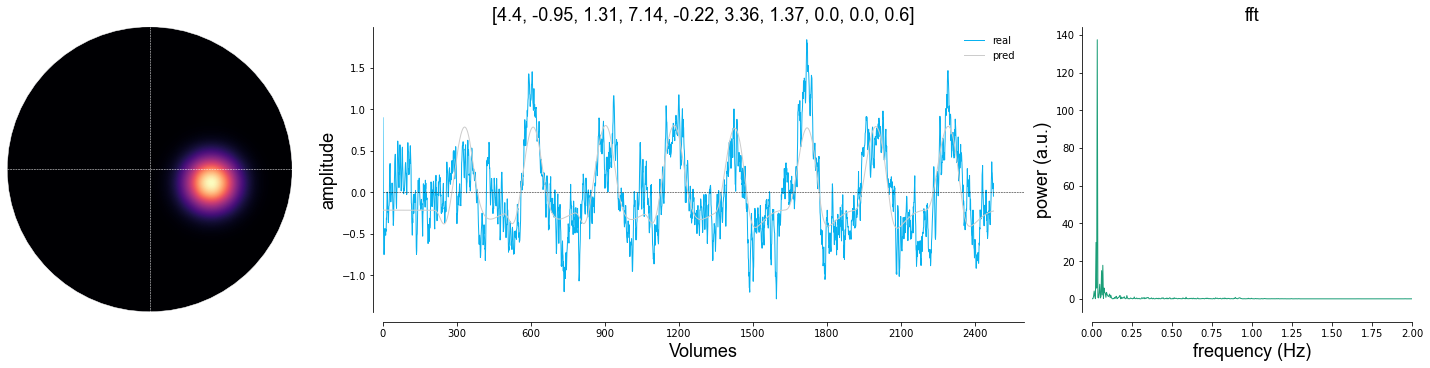

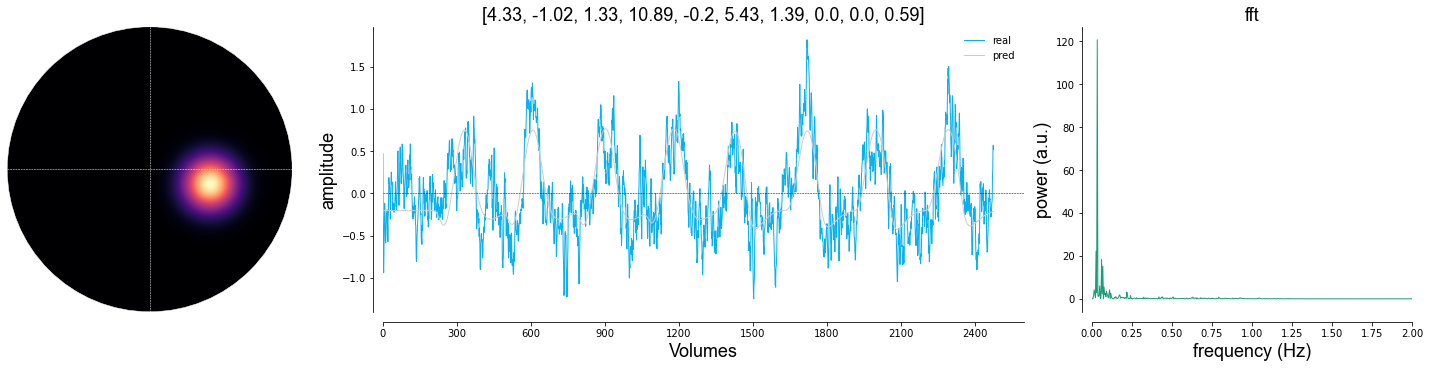

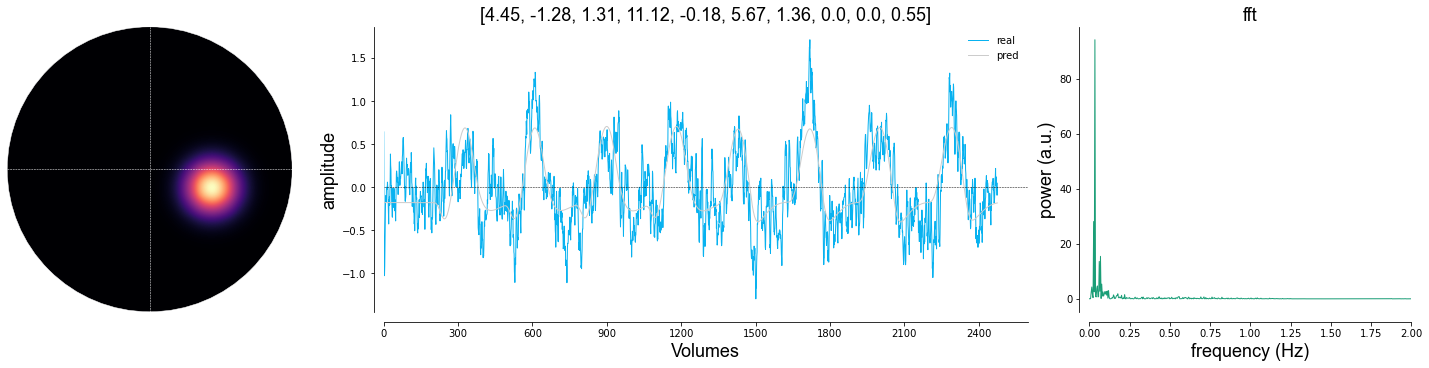

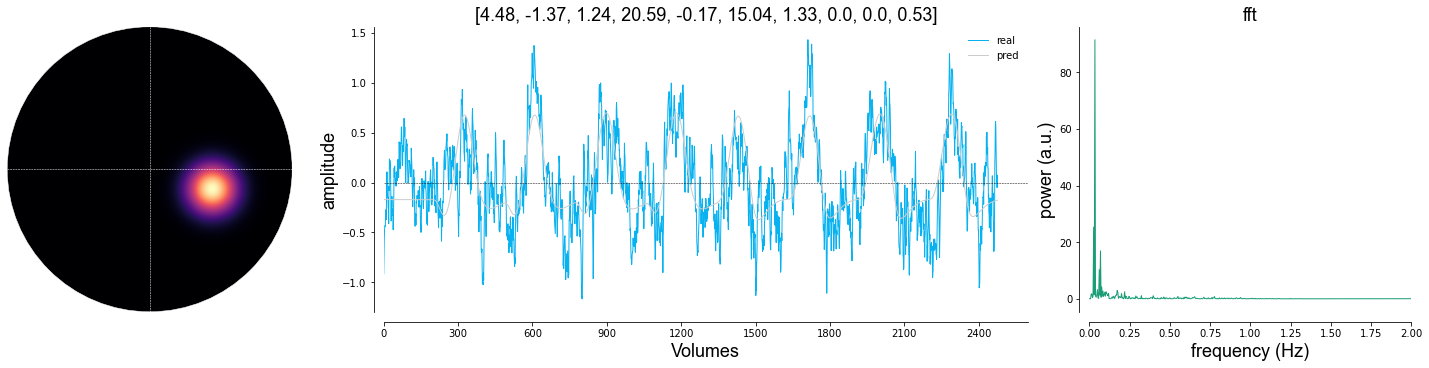

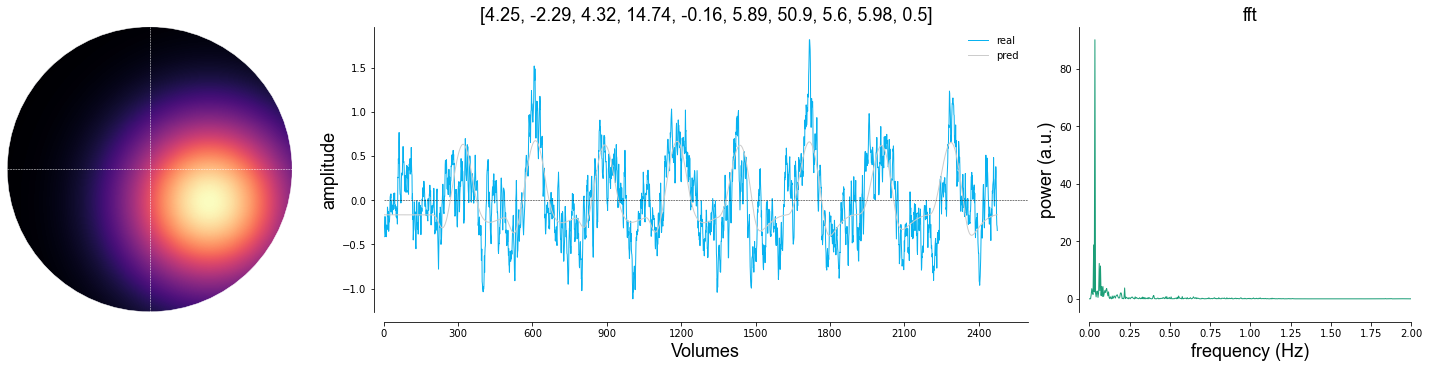

In [87]:
for vox_id in range(*ribbon):
    pars,_,_ = run4_zscore_acomp_lp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

### aCompCor | low-pass | run-5

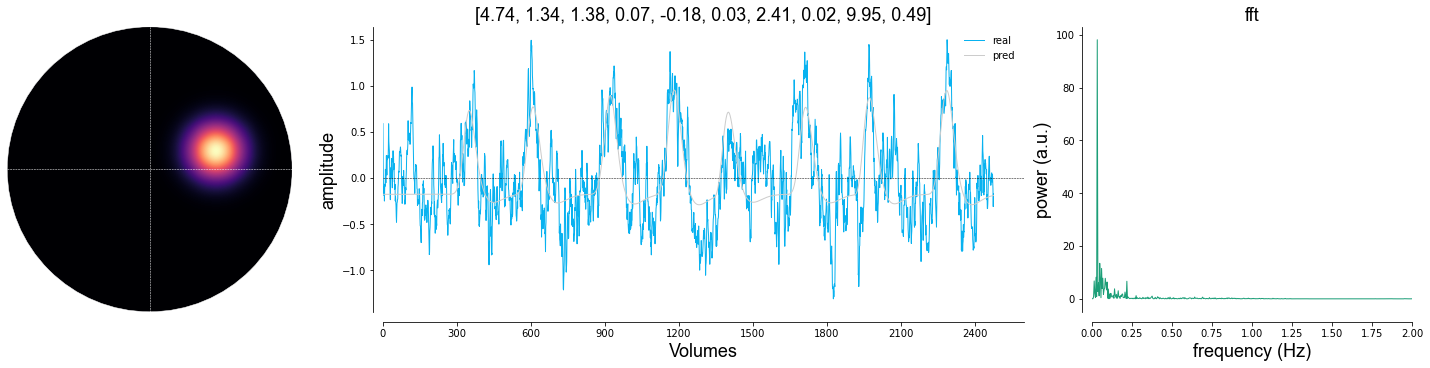

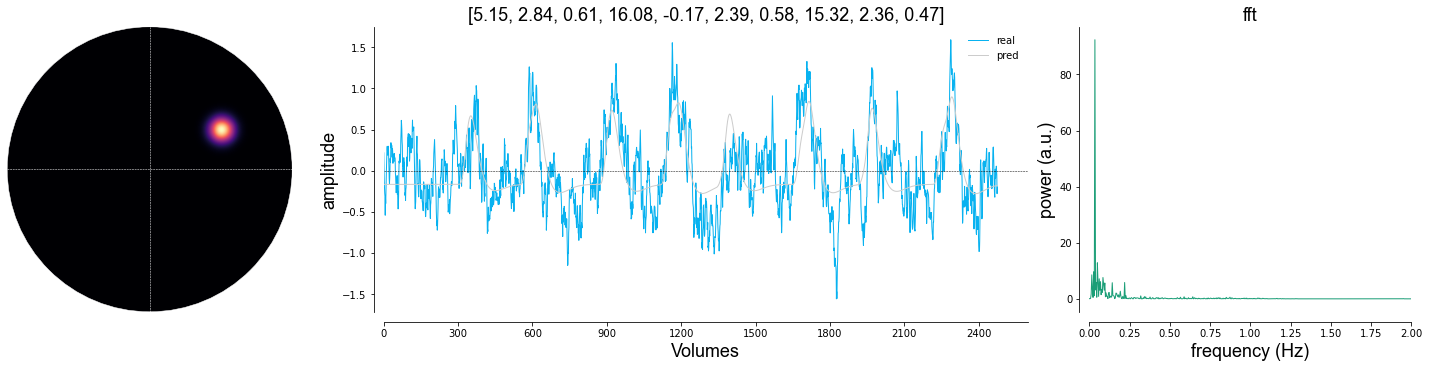

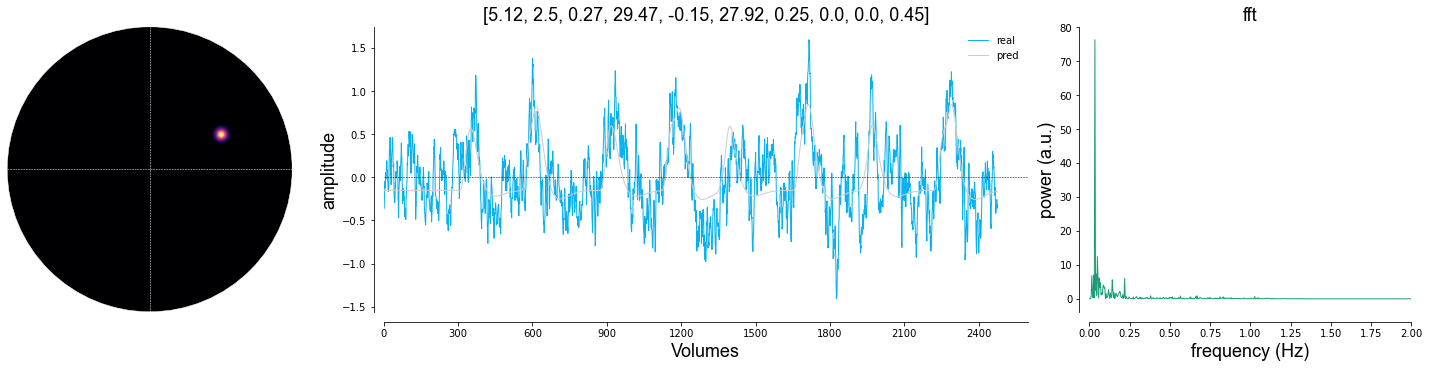

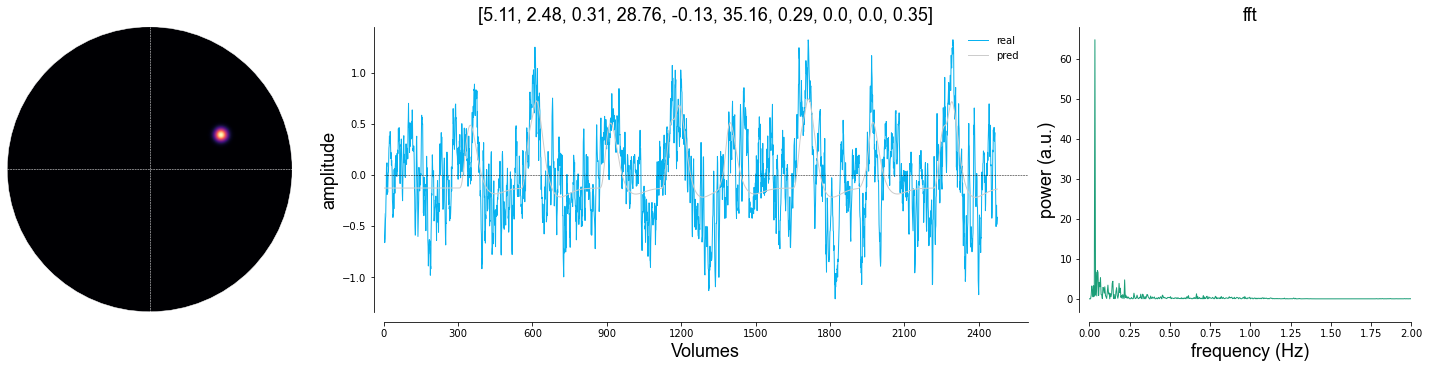

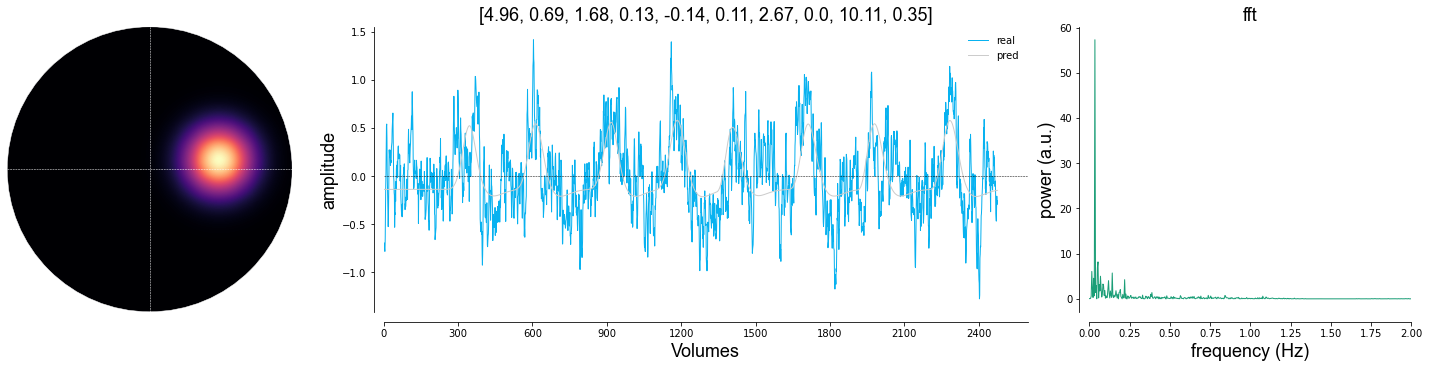

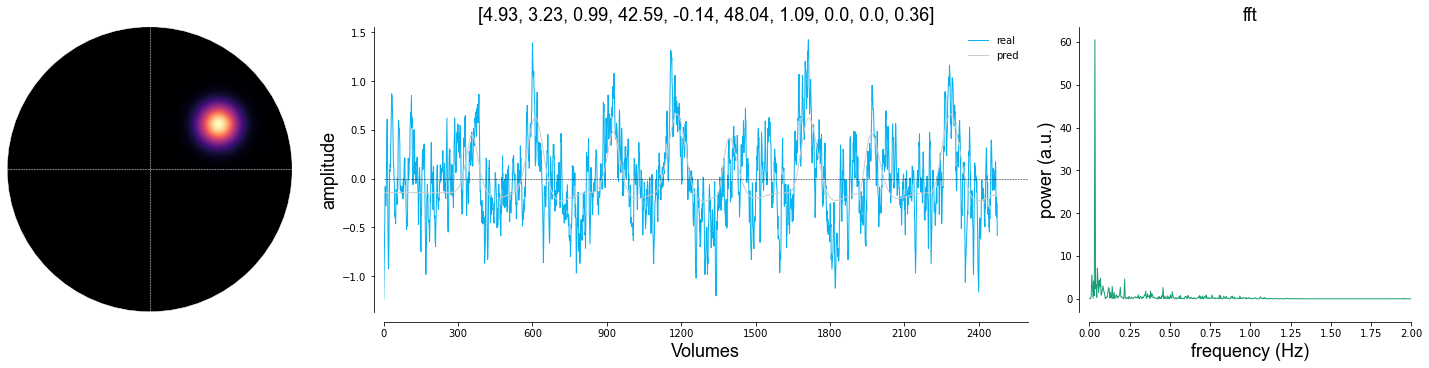

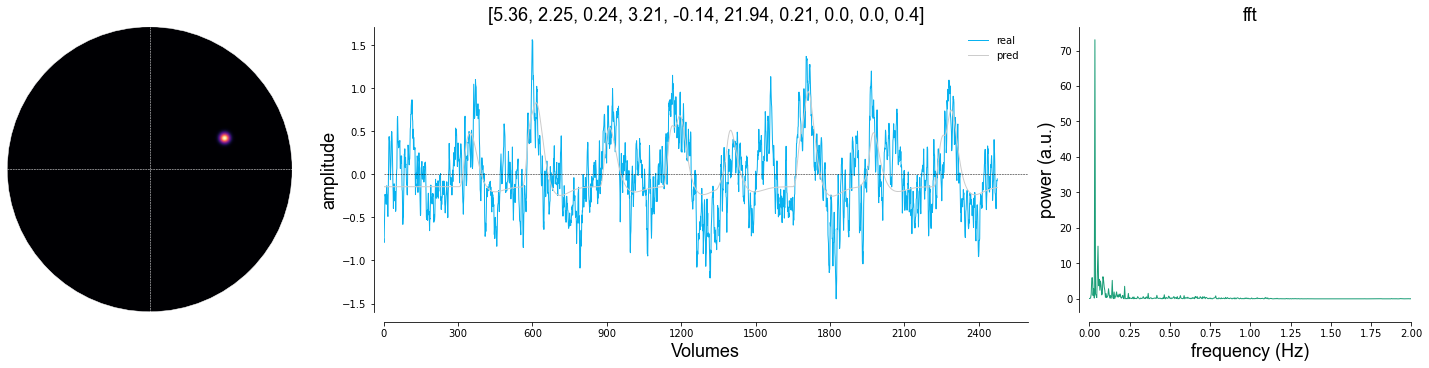

In [90]:
for vox_id in range(*ribbon):
    pars,_,_ = run5_zscore_acomp_lp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

### aCompCor | low-pass | run-6

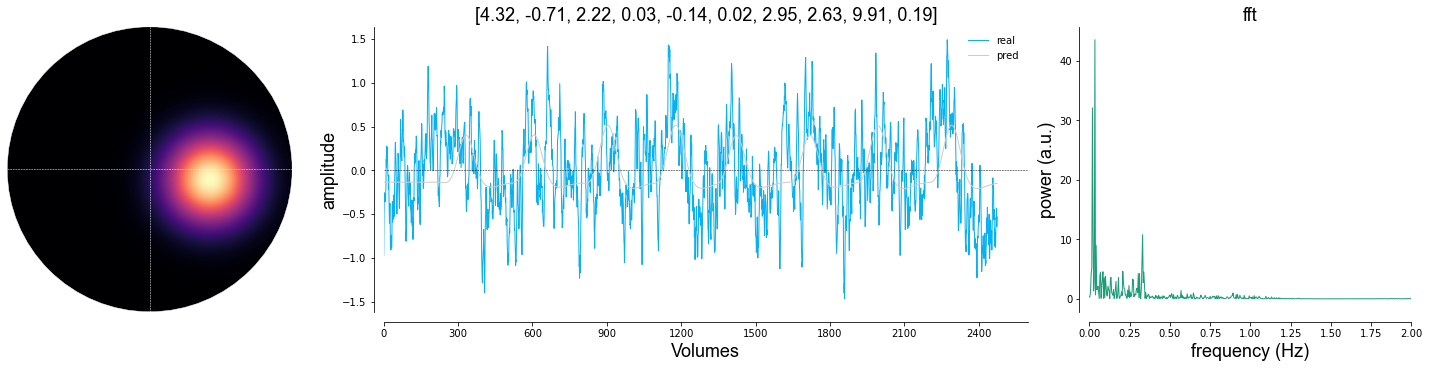

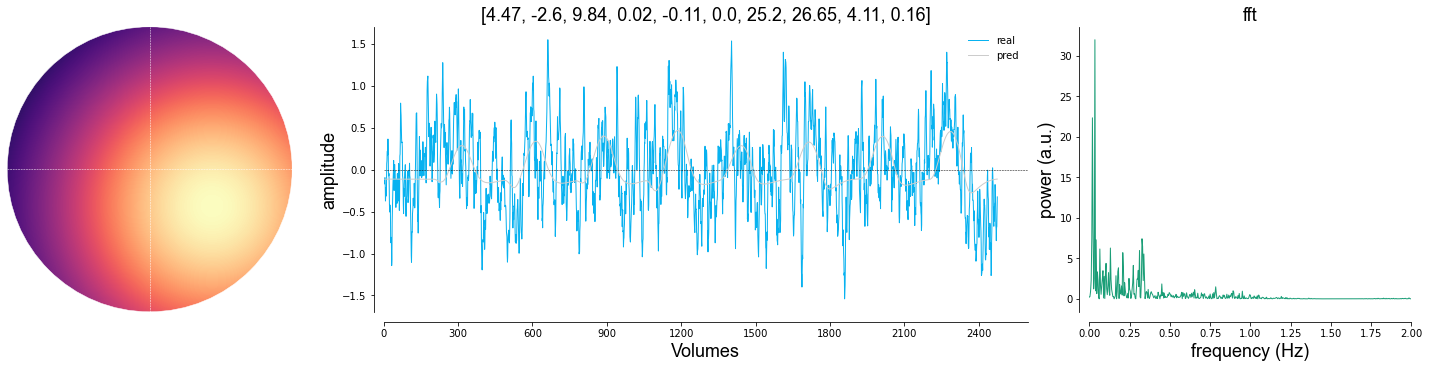

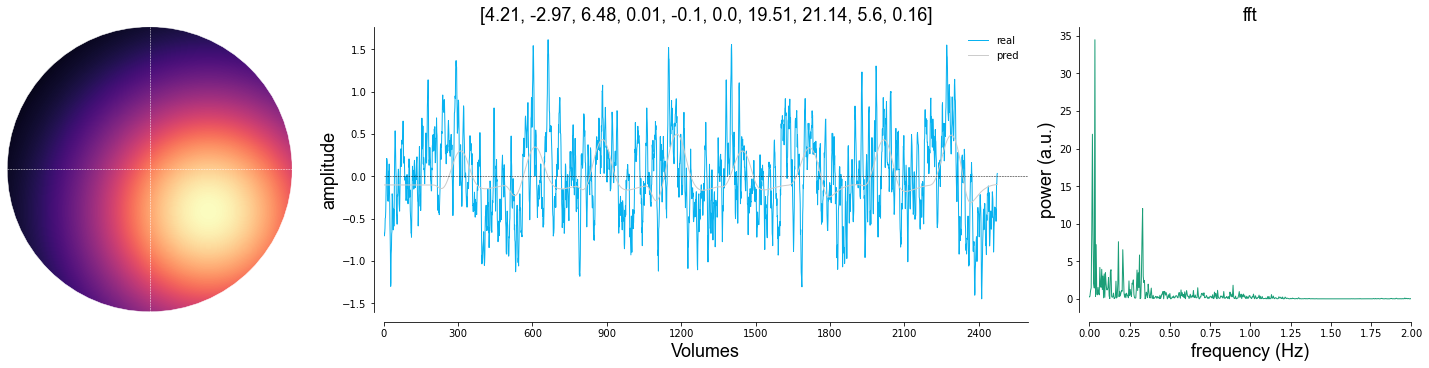

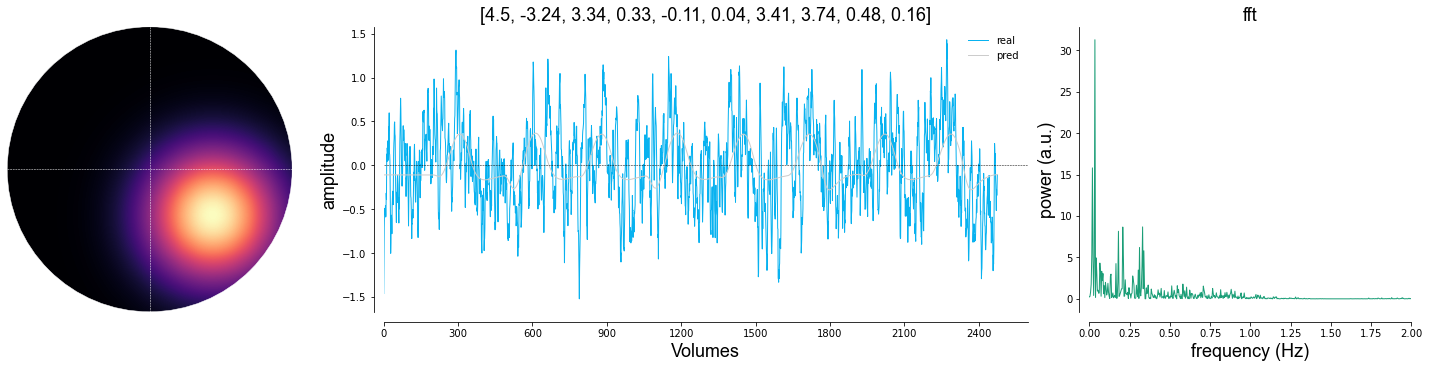

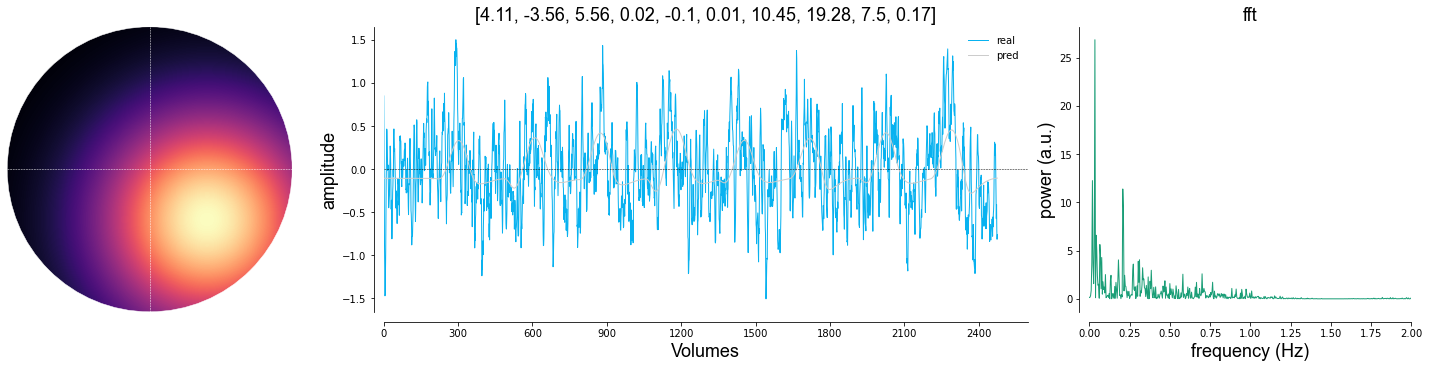

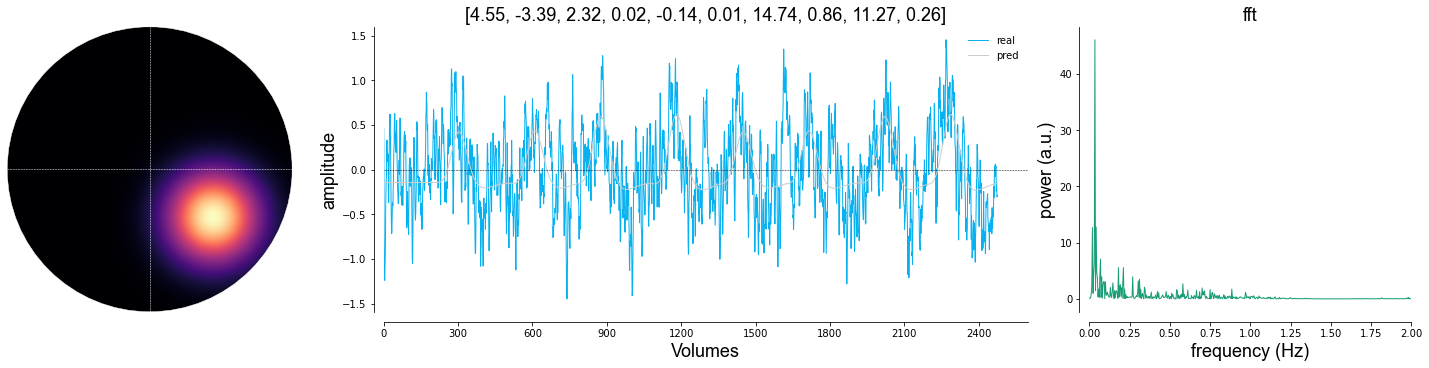

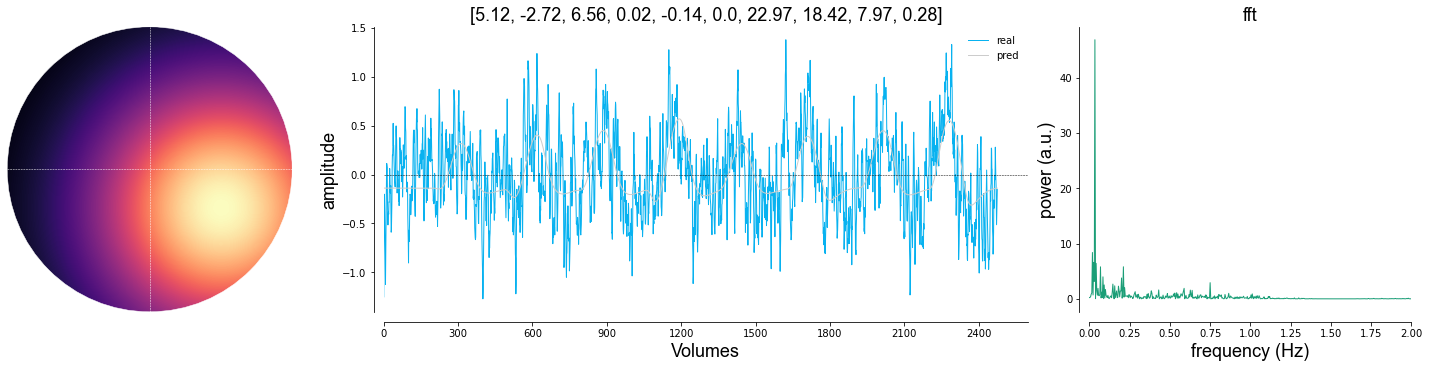

In [89]:
for vox_id in range(*ribbon):
    pars,_,_ = run6_zscore_acomp_lp.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")

## Average across runs/iterations

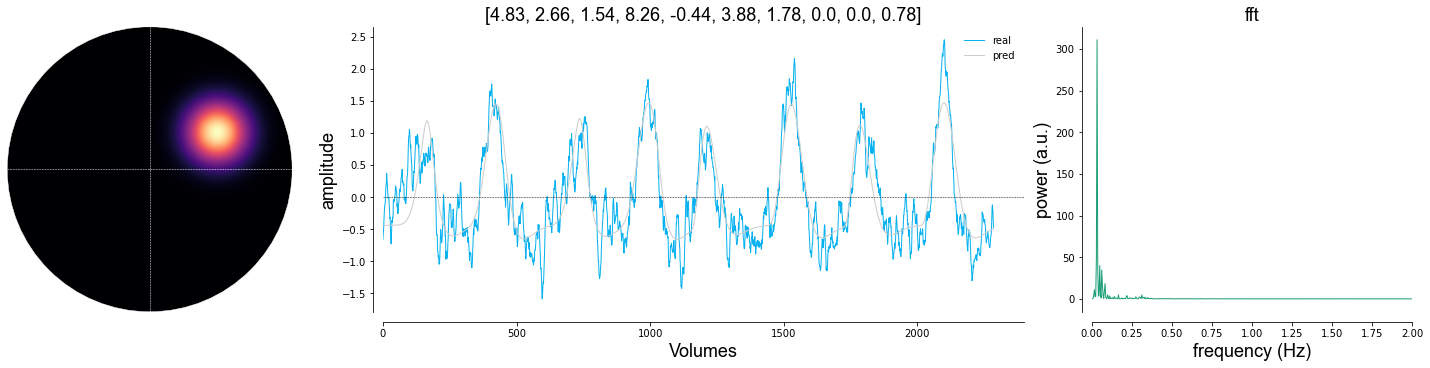

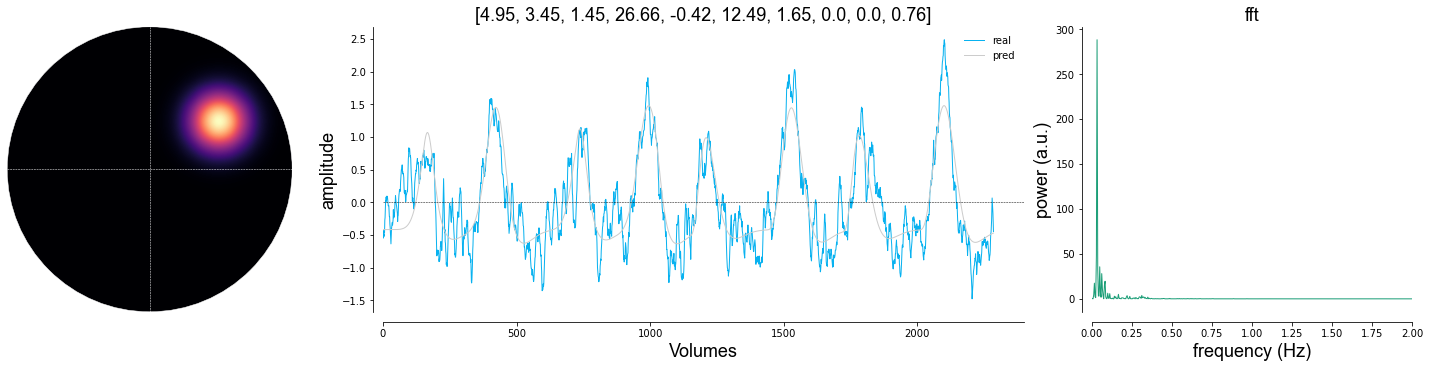

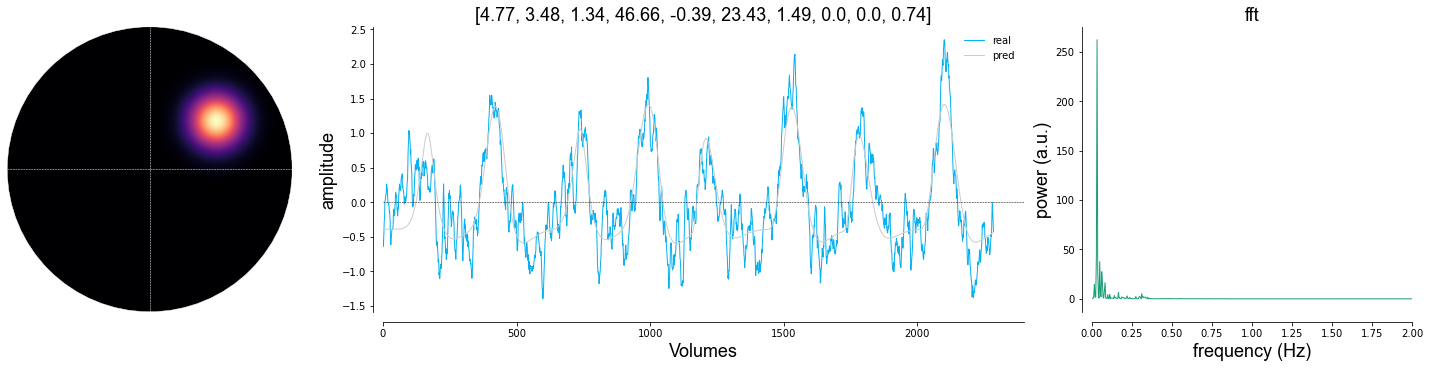

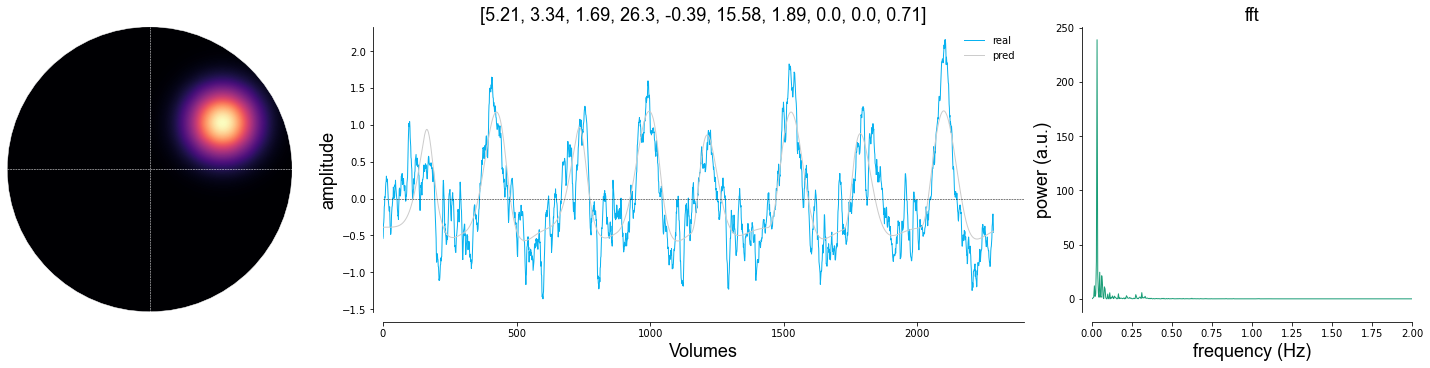

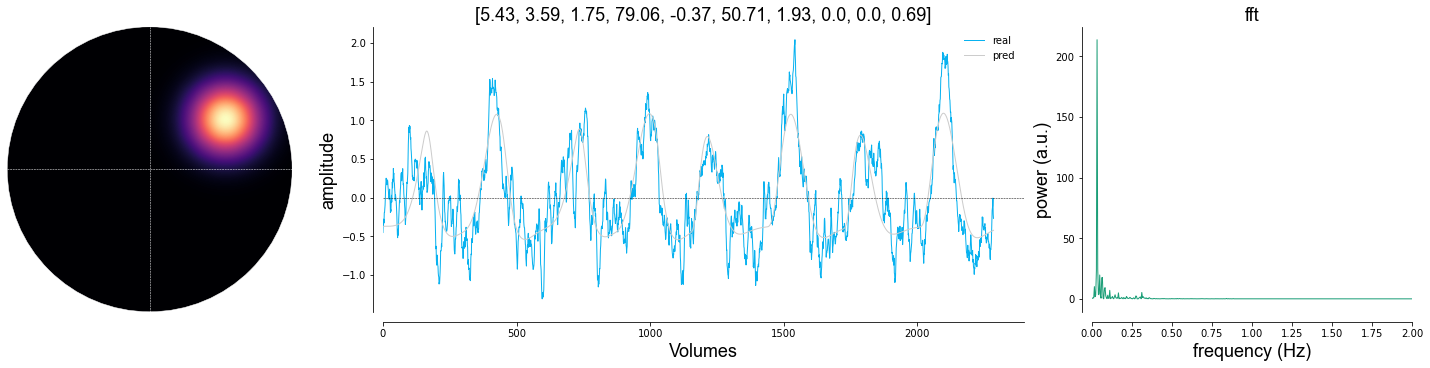

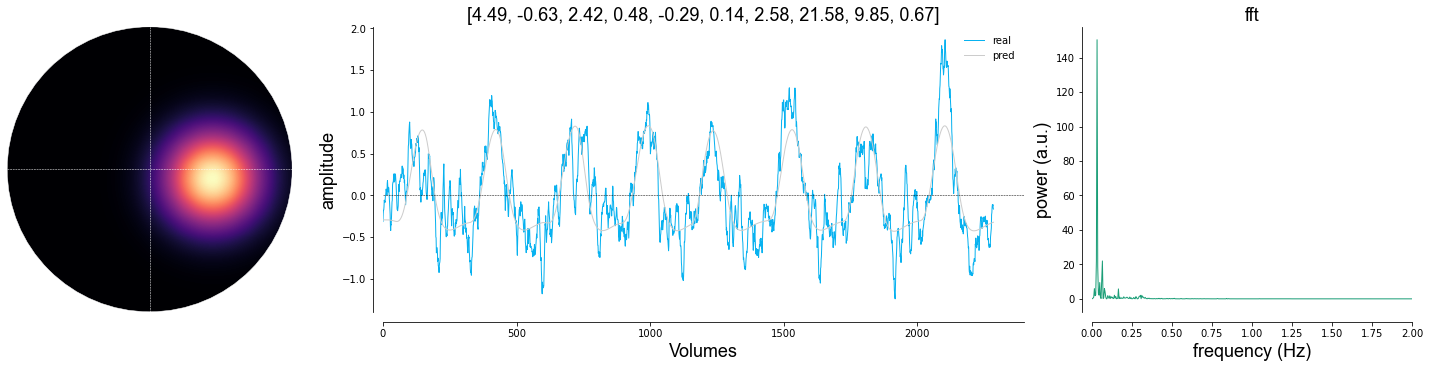

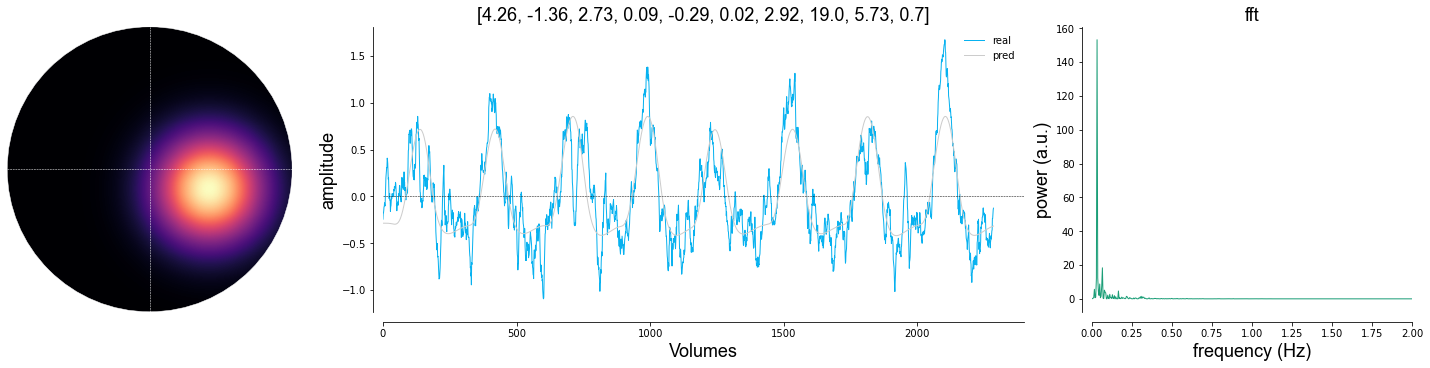

In [9]:
# for vox_id in range(line_fit.df_ribbon.shape[-1]):
#     pars,_,_ = line_fit.fitter.plot_vox(vox_nr=vox_id, model='norm', xkcd=False, title='pars', transpose=False, freq_spectrum=True, freq_type="fft")